In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
import xgboost

c:\users\jhkim6\pycharmprojects\gc\venv\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [4]:
from joblib import dump, load

In [5]:
import json

In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic'})
import sklearn

# 마이너스 부호 깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# row 출력제한 해제
pd.set_option('display.max_row', 500)

# column 출력제한 해제
pd.set_option('display.max_columns', 100)

In [8]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
from impyute.imputation.cs import mice, fast_knn

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from itertools import product
from scipy.stats import gaussian_kde
from scipy import stats

In [12]:
# import keras
# from keras import layers
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping

In [13]:
# import torch 
# from torch import nn,optim
# from torch.utils.data import DataLoader, Dataset
# import torch.nn.functional as F

# Data Load

In [14]:
with open('../input/DM_건강검진결과_토탈_피봇241014.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw = pd.DataFrame(js)

In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Columns: 136 entries, 검진년도 to 심장주위지방CT
dtypes: int64(4), object(132)
memory usage: 1.2+ GB


In [16]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Cortisol(스트레스호르몬)', '성장관련인자(IGF1)', 'Testosterone(테스토스테론)',
       '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)', 'NK세포활성도검사', 'P(인)',
       '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT'],
      dtype='object', length=136)

## config 설정

In [17]:
# scaling_bool = True
scaling_bool = False

In [18]:
sample_len = 2000

In [19]:
XGB_bool = True
pyTorch_bool = False

In [20]:
# 높을수록 False, 낮을수록 True
# 스크리닝 후 80으로 편향 되어 center
# target_cols_direction = ['center', 'center', 'center', 'center']
# target_cols_direction = ['center', 'center', True, 'center']
target_cols_direction = ['center', 'center', 'center', True, ]

In [21]:
target_cols_ratio = [4, 4, 3, 3,]

In [22]:
target_cols_kde = ['갑상선자극호르몬 (TSH)_kde', 'Free T4_kde', 'T3_kde', '갑상선초음파_scaling']

In [23]:
csv_path = './output/내분비기능_갑상선기능.csv'

In [24]:
model_path_man = './model/0401_man.pkl'

In [25]:
model_path_woman = './model/0401_woman.pkl'

In [26]:
# 갑상선 결측치
fill_th = 1
fill_th_score = 90

## 갑상선 Data Load

In [27]:
# with open('../input/TEST_갑상선이상소견추출241127.json', encoding='utf-8') as f:
with open('../input/DM_기능나이_장비검사_이상소견241210.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw_text = pd.DataFrame(js)

In [28]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131105 entries, 0 to 1131104
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   검진년도                     1131105 non-null  int64 
 1   UID                      1131105 non-null  int64 
 2   CU_REC_ID                1131105 non-null  int64 
 3   갑상선초음파 (Thyroid Sono)    614728 non-null   object
 4   경동맥초음파 (Carotid Sono)    280584 non-null   object
 5   대장내시경                    193596 non-null   object
 6   상복부초음파 (Abdominal Sono)  788807 non-null   object
 7   심전도                      1030430 non-null  object
 8   위내시경 (Endo)              829744 non-null   object
dtypes: int64(3), object(6)
memory usage: 77.7+ MB


In [29]:
raw_text.columns

Index(['검진년도', 'UID', 'CU_REC_ID', '갑상선초음파 (Thyroid Sono)',
       '경동맥초음파 (Carotid Sono)', '대장내시경', '상복부초음파 (Abdominal Sono)', '심전도',
       '위내시경 (Endo)'],
      dtype='object')

In [30]:
raw_text.head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo)
0,2022,242726,974419,None,None,None,None,없음,정상
1,2022,242726,1354580,None,None,None,None,없음,정상
2,2022,242726,2513468,None,None,None,None,없음,정상
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검
4,2022,242728,993356,None,None,None,없음,없음,None


In [31]:
len(raw_text)

1131105

In [32]:
raw_text = raw_text.drop_duplicates(subset=['검진년도', 'UID', 'CU_REC_ID'], keep='first')

In [33]:
len(raw_text)

1131105

In [34]:
raw_text.columns

Index(['검진년도', 'UID', 'CU_REC_ID', '갑상선초음파 (Thyroid Sono)',
       '경동맥초음파 (Carotid Sono)', '대장내시경', '상복부초음파 (Abdominal Sono)', '심전도',
       '위내시경 (Endo)'],
      dtype='object')

In [35]:
# raw_text.rename(columns={'갑상선초음파 (Thyroid Sono)':'갑상선초음파 (Thyroid Sono)_text',
#                          '경동맥초음파 (Carotid Sono)':'경동맥초음파 (Carotid Sono)_text',
#                          '대장내시경':'대장내시경_text', 
#                          '상복부초음파 (Abdominal Sono)':'상복부초음파 (Abdominal Sono)_text', 
#                          '심전도':'심전도_text',
#                          '위내시경 (Endo)':'위내시경 (Endo)_text'
#                         }, inplace=True)

In [36]:
raw_text.rename(columns={'갑상선초음파 (Thyroid Sono)':'갑상선초음파 (Thyroid Sono)_text'}, inplace=True)

In [37]:
# raw_text.columns

In [38]:
raw_text['std_str'] = raw_text['갑상선초음파 (Thyroid Sono)_text'].str.replace(' ', '')

In [39]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 10 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   검진년도                        1131105 non-null  int64 
 1   UID                         1131105 non-null  int64 
 2   CU_REC_ID                   1131105 non-null  int64 
 3   갑상선초음파 (Thyroid Sono)_text  614728 non-null   object
 4   경동맥초음파 (Carotid Sono)       280584 non-null   object
 5   대장내시경                       193596 non-null   object
 6   상복부초음파 (Abdominal Sono)     788807 non-null   object
 7   심전도                         1030430 non-null  object
 8   위내시경 (Endo)                 829744 non-null   object
 9   std_str                     614728 non-null   object
dtypes: int64(3), object(7)
memory usage: 94.9+ MB


In [40]:
raw_text[raw_text['std_str'].notnull()]

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono)_text,경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo),std_str
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,갑상선낭종
5,2022,242731,1001976,갑상선결절,None,None,신장낭종,없음,"경도의역류성식도염,중등도만성표재성위염",갑상선결절
6,2022,242734,1252285,"불균질한갑상선결절,갑상선낭종",None,None,지방간,없음,홍반성위염,"불균질한갑상선결절,갑상선낭종"
7,2022,242735,1289962,정상,None,None,정상,없음,만성표재성위염,정상
8,2022,242735,1290410,정상,None,None,정상,없음,만성표재성위염,정상
...,...,...,...,...,...,...,...,...,...,...
1131082,2024,1494459,3016617,없음,None,지방간,None,없음,"만성위축성위염,장상피화생",없음
1131085,2024,1494466,3016681,없음,None,None,None,없음,None,없음
1131086,2024,1494473,3017153,없음,None,None,None,없음,None,없음
1131095,2024,1494500,3019508,갑상선낭종,None,None,없음,없음,"역류성식도염,미란성위염",갑상선낭종


## 라벨링 데이터 join

In [41]:
raw_text_labeling = pd.read_excel('../input/갑상선초음파 (Thyroid Sono).xlsx')

In [42]:
raw_text_labeling.head()

,cate,label,cnt,strip,standard,flag,error_flag,std_str,severity
0,갑상선초음파 (Thyroid Sono),갑상선 결절,96033,갑상선결절,"['갑상선%', '결절$']",True,False,갑상선결절,5
1,갑상선초음파 (Thyroid Sono),갑상선 낭종,87118,갑상선낭종,"['갑상선%', '낭종$']",True,False,갑상선낭종,1
2,갑상선초음파 (Thyroid Sono),불균질한 갑상선 실질,10700,불균질한갑상선실질,"['불균질한%', '갑상선%', '실질$']",True,False,불균질한갑상선실질,3
3,갑상선초음파 (Thyroid Sono),갑상선 결절 의심,7418,갑상선결절의심,"['갑상선%', '결절$', '의심%']",True,False,갑상선결절의심,5
4,갑상선초음파 (Thyroid Sono),없음,6885,없음,['없음$'],True,False,없음,0


In [43]:
raw_text_labeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3355 entries, 0 to 3354
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cate        3355 non-null   object
 1   label       3355 non-null   object
 2   cnt         3355 non-null   int64 
 3   strip       3355 non-null   object
 4   standard    3355 non-null   object
 5   flag        3355 non-null   bool  
 6   error_flag  3355 non-null   bool  
 7   std_str     3355 non-null   object
 8   severity    2661 non-null   object
dtypes: bool(2), int64(1), object(6)
memory usage: 190.2+ KB


In [44]:
raw_text_labeling[['std_str', 'severity']]

,std_str,severity
0,갑상선결절,5
1,갑상선낭종,1
2,불균질한갑상선실질,3
3,갑상선결절의심,5
4,없음,0
...,...,...
3350,혼합에코성종괴,10
3351,후유증의심,NaN
3352,흉막하갑상선저에코병변,5
3353,흉벽지방종,NaN


In [45]:
raw_text_labeling[['std_str', 'severity']].value_counts().head(10)

std_str   severity
결절        5           59
갑상선결절     5           50
갑상선낭종     1           30
낭종        1           24
저에코결절     5           19
갑상선낭종의심   1           15
양엽낭종      1           14
갑상선실질     3           13
갑상선저에코결절  5           12
갑상선저에코병변  5           11
dtype: int64

In [46]:
dic = raw_text_labeling[['std_str', 'severity']].drop_duplicates('std_str')
dic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 3353
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   std_str   1962 non-null   object
 1   severity  1723 non-null   object
dtypes: object(2)
memory usage: 46.0+ KB


In [47]:
raw_text = pd.merge(raw_text, dic, on='std_str', how='left')

In [48]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 11 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   검진년도                        1131105 non-null  int64 
 1   UID                         1131105 non-null  int64 
 2   CU_REC_ID                   1131105 non-null  int64 
 3   갑상선초음파 (Thyroid Sono)_text  614728 non-null   object
 4   경동맥초음파 (Carotid Sono)       280584 non-null   object
 5   대장내시경                       193596 non-null   object
 6   상복부초음파 (Abdominal Sono)     788807 non-null   object
 7   심전도                         1030430 non-null  object
 8   위내시경 (Endo)                 829744 non-null   object
 9   std_str                     614728 non-null   object
 10  severity                    528301 non-null   object
dtypes: int64(3), object(8)
memory usage: 103.6+ MB


In [49]:
raw_text[raw_text['갑상선초음파 (Thyroid Sono)_text'].notnull()].head(500)

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono)_text,경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo),std_str,severity
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,갑상선낭종,1
5,2022,242731,1001976,갑상선결절,None,None,신장낭종,없음,"경도의역류성식도염,중등도만성표재성위염",갑상선결절,5
6,2022,242734,1252285,"불균질한갑상선결절,갑상선낭종",None,None,지방간,없음,홍반성위염,"불균질한갑상선결절,갑상선낭종",NaN
7,2022,242735,1289962,정상,None,None,정상,없음,만성표재성위염,정상,0
8,2022,242735,1290410,정상,None,None,정상,없음,만성표재성위염,정상,0
9,2022,242738,908504,갑상선결절,None,None,None,없음,위염,갑상선결절,5
10,2022,242739,919937,갑상선낭종,None,None,간낭종,없음,만성표지자위염,갑상선낭종,1
12,2022,242741,1184718,갑상선성낭종,정상,None,None,없음,"만성표지성위염,위용종",갑상선성낭종,1
13,2022,242741,1185432,갑상선성낭종,정상,None,None,없음,"만성표지성위염,위용종",갑상선성낭종,1
15,2022,242755,1153246,낭종,None,None,정상,없음,만성위축성위염,낭종,1


In [50]:
def max_value(values):
    max_val = 0
    
    if values == None:
        return
    elif values.find(',') > 0:        
        s = values.split(',')
        df_temp = pd.DataFrame(s, columns=['std_str'])        
        df_temp = pd.merge(df_temp, dic, on='std_str', how='left')
#         print(df_temp.head())
#         print('max :' df_temp['severity'].max())
        return df_temp['severity'].max()

In [51]:
raw_text['severity2'] = raw_text['갑상선초음파 (Thyroid Sono)_text'].apply(max_value)

In [52]:
raw_text[raw_text['갑상선초음파 (Thyroid Sono)_text'].notnull()].head(500)

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono)_text,경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo),std_str,severity,severity2
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,갑상선낭종,1,NaN
5,2022,242731,1001976,갑상선결절,None,None,신장낭종,없음,"경도의역류성식도염,중등도만성표재성위염",갑상선결절,5,NaN
6,2022,242734,1252285,"불균질한갑상선결절,갑상선낭종",None,None,지방간,없음,홍반성위염,"불균질한갑상선결절,갑상선낭종",NaN,5.0
7,2022,242735,1289962,정상,None,None,정상,없음,만성표재성위염,정상,0,NaN
8,2022,242735,1290410,정상,None,None,정상,없음,만성표재성위염,정상,0,NaN
9,2022,242738,908504,갑상선결절,None,None,None,없음,위염,갑상선결절,5,NaN
10,2022,242739,919937,갑상선낭종,None,None,간낭종,없음,만성표지자위염,갑상선낭종,1,NaN
12,2022,242741,1184718,갑상선성낭종,정상,None,None,없음,"만성표지성위염,위용종",갑상선성낭종,1,NaN
13,2022,242741,1185432,갑상선성낭종,정상,None,None,없음,"만성표지성위염,위용종",갑상선성낭종,1,NaN
15,2022,242755,1153246,낭종,None,None,정상,없음,만성위축성위염,낭종,1,NaN


In [53]:
raw_text['severity'].value_counts()

0     286409
1     135903
5      83632
3      22142
10       203
2         10
4          2
Name: severity, dtype: int64

In [54]:
raw_text['severity2'].value_counts()

5.0     74885
3.0      7014
1.0       621
10.0      418
4.0         8
2.0         3
Name: severity2, dtype: int64

In [55]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   검진년도                        1131105 non-null  int64  
 1   UID                         1131105 non-null  int64  
 2   CU_REC_ID                   1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)_text  614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)       280584 non-null   object 
 5   대장내시경                       193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)     788807 non-null   object 
 7   심전도                         1030430 non-null  object 
 8   위내시경 (Endo)                 829744 non-null   object 
 9   std_str                     614728 non-null   object 
 10  severity                    528301 non-null   object 
 11  severity2                   82949 non-null    float64
dtypes: float64(1), int64(3), object(8)
memory usage: 112.2+ 

In [56]:
raw_text[(raw_text['severity'] >= 0) & (raw_text['severity2'] >= 0)]

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono)_text,경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo),std_str,severity,severity2


In [57]:
raw_text['severity'] = raw_text['severity'].astype(np.float64)
raw_text['severity2'] = raw_text['severity2'].astype(np.float64)

In [58]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   검진년도                        1131105 non-null  int64  
 1   UID                         1131105 non-null  int64  
 2   CU_REC_ID                   1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)_text  614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)       280584 non-null   object 
 5   대장내시경                       193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)     788807 non-null   object 
 7   심전도                         1030430 non-null  object 
 8   위내시경 (Endo)                 829744 non-null   object 
 9   std_str                     614728 non-null   object 
 10  severity                    528301 non-null   float64
 11  severity2                   82949 non-null    float64
dtypes: float64(2), int64(3), object(7)
memory usage: 112.2+ 

In [59]:
arr = []
for idx, value in enumerate(raw_text['severity']):
    if value >= 0:
        arr.append(value)
    elif raw_text.loc[idx, 'severity2'] >= 0:
        arr.append(raw_text.loc[idx, 'severity2'])
    else:
        arr.append(np.nan)

In [60]:
len(arr)

1131105

In [61]:
raw_text['갑상선초음파'] = arr

In [62]:
raw_text.head(500)

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono)_text,경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo),std_str,severity,severity2,갑상선초음파
0,2022,242726,974419,None,None,None,None,없음,정상,None,NaN,NaN,NaN
1,2022,242726,1354580,None,None,None,None,없음,정상,None,NaN,NaN,NaN
2,2022,242726,2513468,None,None,None,None,없음,정상,None,NaN,NaN,NaN
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,갑상선낭종,1.0,NaN,1.0
4,2022,242728,993356,None,None,None,없음,없음,None,None,NaN,NaN,NaN
5,2022,242731,1001976,갑상선결절,None,None,신장낭종,없음,"경도의역류성식도염,중등도만성표재성위염",갑상선결절,5.0,NaN,5.0
6,2022,242734,1252285,"불균질한갑상선결절,갑상선낭종",None,None,지방간,없음,홍반성위염,"불균질한갑상선결절,갑상선낭종",NaN,5.0,5.0
7,2022,242735,1289962,정상,None,None,정상,없음,만성표재성위염,정상,0.0,NaN,0.0
8,2022,242735,1290410,정상,None,None,정상,없음,만성표재성위염,정상,0.0,NaN,0.0
9,2022,242738,908504,갑상선결절,None,None,None,없음,위염,갑상선결절,5.0,NaN,5.0


## Join

In [63]:
raw[['검진년도', 'UID', 'CU_REC_ID']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   검진년도       1227553 non-null  object
 1   UID        1227553 non-null  int64 
 2   CU_REC_ID  1227553 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 28.1+ MB


In [64]:
raw['검진년도'] = raw['검진년도'].astype(int)

In [65]:
raw[['검진년도', 'UID', 'CU_REC_ID']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   검진년도       1227553 non-null  int32
 1   UID        1227553 non-null  int64
 2   CU_REC_ID  1227553 non-null  int64
dtypes: int32(1), int64(2)
memory usage: 23.4 MB


In [66]:
len(raw)

1227553

In [67]:
raw = pd.merge(raw, raw_text[['검진년도', 'UID', 'CU_REC_ID', '갑상선초음파 (Thyroid Sono)_text', '갑상선초음파']], 
               on=['검진년도', 'UID', 'CU_REC_ID'], how='left')

In [68]:
len(raw)

1227553

## 연령대 제한

In [69]:
len(raw)

1227553

In [70]:
raw = raw[(raw['검진당시나이'] >= 20) & (raw['검진당시나이'] < 70)]
raw.reset_index(drop=True, inplace=True)

In [71]:
len(raw)

1213899

In [72]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Testosterone(테스토스테론)', '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)',
       'NK세포활성도검사', 'P(인)', '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT',
       '갑상선초음파 (Thyroid Sono)_text', '갑상선초음파'],
      dtype='object', length=138)

In [73]:
# df = raw.drop(['CU_INF_CONT', 'BRDT', 'ETL_REG_DTM', '검진완료일자',                           
#                # text
#                '심전도', '아질산염 (Nitrite)',
#                '갑상선초음파 (Thyroid Sono)', '위내시경 (Endo)', '상복부초음파 (Abdominal Sono)', '대장내시경',
#                '흉부X-선 (Chest PA)', '골밀도검사(BMD)', '경동맥초음파 (Carotid Sono)', '요추 CT', '뇌 CT', '동맥경화검사', '경추 CT',
#                '심장초음파 (Echocardio Sono)', '뇌MRI', '뇌MRA', '골밀도검사(허리)', '골밀도검사 (T-Score)', 
#                '위암혈액검사(Pepsinogen I)', 'Gastrin(가스트린)', 'Helicobactor pylori IgG(혈액)', 
#                'Helicobactor Pylori IgM(혈액)', '심장칼슘CT', '심장주위지방CT',
#               ], axis=1)

In [74]:
cols = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
#                '체중', '신장', '허리둘레', # 기본신체정보
        '갑상선자극호르몬 (TSH)', 'Free T4', 'T3', '갑상선초음파 (Thyroid Sono)_text', '갑상선초음파',
               ]

df = raw[cols]

In [75]:
df.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파
0,2010,7282,2520,1,42,2.56,None,1.06,None,NaN
1,2010,7490,3638,1,39,2.9,1.39,None,정상,0.0
2,2010,7915,3997,1,36,0.918,None,1.16,None,NaN
3,2010,8056,4745,1,42,1.2,None,None,정상,0.0
4,2010,8457,3929,1,38,1.317,None,1.13,None,NaN


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 10 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   검진년도                        1213899 non-null  int32  
 1   UID                         1213899 non-null  int64  
 2   CU_REC_ID                   1213899 non-null  int64  
 3   SEX                         1213899 non-null  int64  
 4   검진당시나이                      1213899 non-null  int64  
 5   갑상선자극호르몬 (TSH)              1019644 non-null  object 
 6   Free T4                     940198 non-null   object 
 7   T3                          296302 non-null   object 
 8   갑상선초음파 (Thyroid Sono)_text  573679 non-null   object 
 9   갑상선초음파                      570410 non-null   float64
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 88.0+ MB


In [77]:
df.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '갑상선자극호르몬 (TSH)',
       'Free T4', 'T3', '갑상선초음파 (Thyroid Sono)_text', '갑상선초음파'],
      dtype='object')

<AxesSubplot:xlabel='index'>

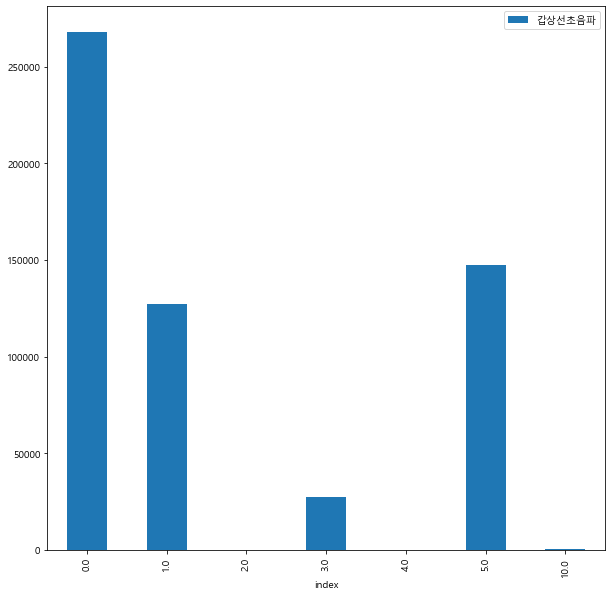

In [78]:
plt.rcParams["figure.figsize"] = (10, 10)
df['갑상선초음파'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='갑상선초음파')

## 그룹별 결측값을 대체, 종합검진과 공단검진 차이(누락)에 대한 대체

In [79]:
df.isnull().sum()

검진년도                               0
UID                                0
CU_REC_ID                          0
SEX                                0
검진당시나이                             0
갑상선자극호르몬 (TSH)                194255
Free T4                       273701
T3                            917597
갑상선초음파 (Thyroid Sono)_text    640220
갑상선초음파                        643489
dtype: int64

In [80]:
df_group = df.groupby(['UID', '검진년도'])

In [81]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [82]:
temp

['갑상선자극호르몬 (TSH)', 'Free T4', 'T3', '갑상선초음파 (Thyroid Sono)_text', '갑상선초음파']

In [83]:
import time
start = time.time()
for col in temp:
    print('column :', col)
    df[col] = df_group[col].transform(lambda x: x.interpolate('nearest').ffill().bfill())
end = time.time()
print(f"{end - start:.5f} sec")

column : 갑상선자극호르몬 (TSH)
column : Free T4
column : T3
column : 갑상선초음파 (Thyroid Sono)_text
column : 갑상선초음파
2887.11251 sec


In [84]:
df.isnull().sum()

검진년도                               0
UID                                0
CU_REC_ID                          0
SEX                                0
검진당시나이                             0
갑상선자극호르몬 (TSH)                135023
Free T4                       219618
T3                            897764
갑상선초음파 (Thyroid Sono)_text    604837
갑상선초음파                        608281
dtype: int64

## nemeric으로 치환 못하는 수치들 결측치로 변환

In [85]:
numeric_col = df.drop(columns=['갑상선초음파 (Thyroid Sono)_text']).columns

In [86]:
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 10 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   검진년도                        1213899 non-null  int32  
 1   UID                         1213899 non-null  int64  
 2   CU_REC_ID                   1213899 non-null  int64  
 3   SEX                         1213899 non-null  int64  
 4   검진당시나이                      1213899 non-null  int64  
 5   갑상선자극호르몬 (TSH)              1077063 non-null  float64
 6   Free T4                     992958 non-null   float64
 7   T3                          314605 non-null   float64
 8   갑상선초음파 (Thyroid Sono)_text  609062 non-null   object 
 9   갑상선초음파                      605618 non-null   float64
dtypes: float64(4), int32(1), int64(4), object(1)
memory usage: 88.0+ MB


In [88]:
df.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.077063e+06,9.929580e+05,314605.000000,605618.000000
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,1.968269e+00,4.162080e+01,30.826063,1.663240
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,1.593283e+01,2.843815e+04,50.509930,2.102907
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,1.130000e+00,1.110000e+00,1.000000,0.000000
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,1.640000e+00,1.270000e+00,1.200000,1.000000
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,2.380000e+00,1.410000e+00,82.700000,5.000000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,1.638800e+04,2.101618e+07,651.000000,10.000000


In [89]:
df['갑상선초음파'].value_counts()

0.0     285086
5.0     155815
1.0     135159
3.0      28910
10.0       626
2.0         12
4.0         10
Name: 갑상선초음파, dtype: int64

In [90]:
df_result = df.drop(columns=['갑상선초음파 (Thyroid Sono)_text']).copy()

# 이상치 제거

In [91]:
len(df_result)

1213899

In [92]:
# IQR 기준 이상치 확인하는 함수
def findOutliers_column(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print('minimum :', minimum, 'maximum :', maximum)
    y = x[(x[column] > maximum) | (x[column] < minimum)]
#     y = x[(x[column] <= maximum) & (x[column] >= minimum)]
#     print(y.info())
#     print(y.index)
    return y, minimum, maximum

def findOutliers_column_out(x, column, minimum, maximum):
    y = x[(x[column] > maximum) | (x[column] < minimum)]
    return y
    
# IQR 기준 이상치 확인하는 함수
def findOutliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print(minimum)
    y = x[(x > maximum) | (x < minimum)]
#     return len(y)
    return y

## 이상치 컬럼 min, max 확인 및 drop

In [93]:
temp = df_result.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [94]:
# IQR 기준 이상치 개수 확인
# target_cols = [
#                '검진당시나이', 
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)', #기본신체정보
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                ]
target_cols = temp

minimums = []
maximums = []

for col in target_cols:
    target_outlier, temp_min, temp_max = findOutliers_column(df_result, col)
    print(col, ':', len(df_result[col]),"/ IQR outliers: ", len(target_outlier), '/ ratio :', len(target_outlier)/len(df_result[col]))
    print()
    minimums.append(temp_min)
    maximums.append(temp_max)

for idx, col in enumerate(target_cols):    
    target_outlier = findOutliers_column_out(df_result, col, minimums[idx], maximums[idx])
    df_result = df_result.drop(target_outlier.index)
    df_result.reset_index(drop=True, inplace=True)

minimum : -0.7450000000000001 maximum : 4.255
갑상선자극호르몬 (TSH) : 1213899 / IQR outliers:  48404 / ratio : 0.03987481660335827

minimum : 0.6600000000000004 maximum : 1.8599999999999997
Free T4 : 1213899 / IQR outliers:  11583 / ratio : 0.00954198001645936

minimum : -121.55000000000001 maximum : 205.25
T3 : 1213899 / IQR outliers:  140 / ratio : 0.00011533084712978592

minimum : -7.5 maximum : 12.5
갑상선초음파 : 1213899 / IQR outliers:  0 / ratio : 0.0



In [95]:
target_cols

['갑상선자극호르몬 (TSH)', 'Free T4', 'T3', '갑상선초음파']

In [96]:
minimums

[-0.7450000000000001, 0.6600000000000004, -121.55000000000001, -7.5]

In [97]:
maximums

[4.255, 1.8599999999999997, 205.25, 12.5]

In [98]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154491 entries, 0 to 1154490
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   검진년도            1154491 non-null  int32  
 1   UID             1154491 non-null  int64  
 2   CU_REC_ID       1154491 non-null  int64  
 3   SEX             1154491 non-null  int64  
 4   검진당시나이          1154491 non-null  int64  
 5   갑상선자극호르몬 (TSH)  1018135 non-null  float64
 6   Free T4         937685 non-null   float64
 7   T3              296431 non-null   float64
 8   갑상선초음파          575843 non-null   float64
dtypes: float64(4), int32(1), int64(4)
memory usage: 74.9 MB


In [99]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파
0,2010,7282,2520,1,42,2.560,NaN,1.06,NaN
1,2010,7490,3638,1,39,2.900,1.39,NaN,0.0
2,2010,7915,3997,1,36,0.918,NaN,1.16,NaN
3,2010,8056,4745,1,42,1.200,NaN,NaN,0.0
4,2010,8457,3929,1,38,1.317,NaN,1.13,NaN


In [100]:
len(df_result)

1154491

In [101]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154491 entries, 0 to 1154490
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   검진년도            1154491 non-null  int32  
 1   UID             1154491 non-null  int64  
 2   CU_REC_ID       1154491 non-null  int64  
 3   SEX             1154491 non-null  int64  
 4   검진당시나이          1154491 non-null  int64  
 5   갑상선자극호르몬 (TSH)  1018135 non-null  float64
 6   Free T4         937685 non-null   float64
 7   T3              296431 non-null   float64
 8   갑상선초음파          575843 non-null   float64
dtypes: float64(4), int32(1), int64(4)
memory usage: 74.9 MB


In [102]:
df_result.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파
count,1.154491e+06,1.154491e+06,1.154491e+06,1.154491e+06,1.154491e+06,1.018135e+06,937685.000000,296431.000000,575843.000000
mean,2.021882e+03,5.096192e+05,1.495099e+06,1.367441e+00,4.068328e+01,1.744095e+00,1.264554,30.281661,1.652881
std,1.699659e+00,3.655318e+05,7.923804e+05,4.821081e-01,8.904280e+00,8.474770e-01,0.211969,49.866689,2.104747
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000e+00,0.661000,0.000000,0.000000
25%,2.021000e+03,2.215270e+05,6.833695e+05,1.000000e+00,3.400000e+01,1.110000e+00,1.110000,1.000000,0.000000
50%,2.022000e+03,3.811800e+05,1.421074e+06,1.000000e+00,4.000000e+01,1.600000e+00,1.270000,1.200000,1.000000
75%,2.023000e+03,8.380590e+05,2.175320e+06,2.000000e+00,4.800000e+01,2.250000e+00,1.410000,81.000000,5.000000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,4.255000e+00,1.850000,205.000000,10.000000


# 스크리닝

## 스크리닝

In [103]:
# screening = 80

In [104]:
# scr_col = 'ALP'

In [105]:
# df_result[df_result[scr_col] < screening].head()

In [106]:
# len(df_result[df_result[scr_col] < screening])

In [107]:
# df_result.loc[df_result[scr_col] < screening, scr_col] = screening

In [108]:
# df_result[df_result[scr_col] < screening].head()

In [109]:
# len(df_result[df_result[scr_col] < screening])

# target (건강지수) 계산

In [110]:
len(df_result)

1154491

## Linear Regression coefficient 계산

In [111]:
def LR_coef(df):
    df_ = df.copy()
#     df_.reset_index(drop=True, inplace=True)
    df_.fillna(df_.mean().round(2), inplace=True)
    print(len(df_))
    
    df_temp = pd.DataFrame()

    for age in range(df_['검진당시나이'].min(), df_['검진당시나이'].max()):
        temp_ = df_[df_['검진당시나이'] == age].sample(n = sample_len, replace=True)
        df_temp = pd.concat([df_temp, temp_])
        
    X_train, X_test, y_train, y_test = train_test_split(df_temp[target_cols], df_temp['검진당시나이'], test_size=0.25, random_state=87)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('r2_score :',r2_score(y_test, y_pred))
    print('MAE :',mean_absolute_error(y_test, y_pred))
    print('model.coef_ :',model.coef_)
    print('model.intercept_ :',model.intercept_)
    
    df_['target_org'] = (model.coef_[0] * df_[target_cols[0]]) 
    + (model.coef_[1] * df_[target_cols[1]]) 
    + (model.coef_[2] * df_[target_cols[2]]) 
    + (model.coef_[3] * df_[target_cols[3]]) 
    + (model.coef_[4] * df_[target_cols[4]]) 
    + (model.coef_[5] * df_[target_cols[5]]) 
    + (model.coef_[6] * df_[target_cols[6]])
    + (model.coef_[7] * df_[target_cols[7]])
    
    df_['target'] = ((df_['target_org'] - df_['target_org'].min()) / (df_['target_org'].max() - df_['target_org'].min()))
        
    print('min :', df_['target_org'].min())
    print('max :', df_['target_org'].max())
    
    df_['target'] = (df_['target'] * 100) + 50
    
    df['target'] = df_['target']
    
    return df

In [112]:
# target_cols

In [113]:
# df_man = df_result[df_result['SEX'] == 1]
# df_man = LR_coef(df_man)

In [114]:
# df_man[df_man['target'].isna()]

In [115]:
# df_woman = df_result[df_result['SEX'] == 2]
# df_woman = LR_coef(df_woman)

In [116]:
# df_target = pd.concat([df_man, df_woman])

In [117]:
# len(df_target)

In [118]:
# df_target.dropna(subset=target_cols, how='all', inplace=True)
# df_target.reset_index(drop=True, inplace=True)

In [119]:
# len(df_target)

In [120]:
# df_target[df_target['target'].isna()]

In [121]:
# df_target.info()

In [122]:
# df_target.head()

In [123]:
# df_target['target'] = np.round(df_target['target'])
# df_target['target'] = df_target['target'].astype(int)

In [124]:
# len(df_target)

In [125]:
# df_target.describe()

In [126]:
# df_target[df_target['target'] == 50]

In [127]:
# df_target[df_target['target'] == 150]

## target (건강지수) 컬럼들간 mean으로 계산

In [128]:
# df_target = pd.DataFrame()

# for age in range(int(df_result['검진당시나이'].min()), int(df_result['검진당시나이'].max()) + 1):
# # for age in range(int(df_result['검진당시나이'].min()), 21):
    
#     df_cols = pd.DataFrame()
#     for col in target_cols:
#         df_temp = df_result[df_result['검진당시나이'] == age].copy()
#         df_temp['target_' + col] = ((df_temp[col] - df_temp[col].min()) / (df_temp[col].max() - df_temp[col].min()))
# #         print(age, df_temp[col].min(), df_temp[col].max(), df_temp[col].mean())
#         temp = df_temp['target_' + col].copy()
#         df_cols = pd.concat([df_cols, temp], axis=1)
    
#     df_cols['target'] = np.round(df_cols.mean(axis='columns') * 100) + 50
# #     df_target = pd.concat([df_target,pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols], axis=1)])
    
#     df_age = pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols['target']], axis=1)        
    
#     df_target = pd.concat([df_target, df_age])
    
# df_target.reset_index(drop=True, inplace=True)
# df_target.dropna(subset=['target'], inplace=True)
# df_target['target'] = df_target['target'].astype(int)

In [129]:
# len(df_target)

In [130]:
# df_target.head()

In [131]:
# df_target.info()

## gaussian_kde

<AxesSubplot:>

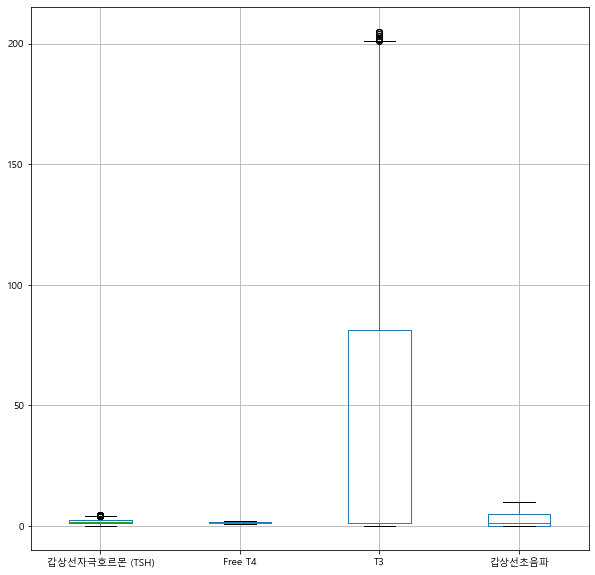

In [132]:
plt.rcParams["figure.figsize"] = (10, 10)
df_result.boxplot(column=target_cols)

In [133]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파
0,2010,7282,2520,1,42,2.560,NaN,1.06,NaN
1,2010,7490,3638,1,39,2.900,1.39,NaN,0.0
2,2010,7915,3997,1,36,0.918,NaN,1.16,NaN
3,2010,8056,4745,1,42,1.200,NaN,NaN,0.0
4,2010,8457,3929,1,38,1.317,NaN,1.13,NaN


In [134]:
target_cols

['갑상선자극호르몬 (TSH)', 'Free T4', 'T3', '갑상선초음파']

In [135]:
len(target_cols)

4

In [136]:
target_cols_direction

['center', 'center', 'center', True]

In [137]:
def kde_col(df, cols):
    
    threshold = 100
    max_threshold = 150
    
    df_target = pd.DataFrame() # return DF
    
    # 연령대별로 sample_len개 샘플링
    tmp_data = df.groupby(['SEX', '검진당시나이']).apply(
        lambda x: x.sample(sample_len, replace=True, random_state=42))

    tmp_data.reset_index(drop=True, inplace=True)
    
    # 성연령별 모델 생성
    for sex, age in product([1, 2], range(df['검진당시나이'].min(), df['검진당시나이'].max() + 1)):    
        tmp_data2 = tmp_data[tmp_data['SEX'] == sex]
        tmp_data3 = tmp_data2[tmp_data2['검진당시나이'] == age]
        
        df_temp = df[df['SEX'] == sex]
        df_temp = df_temp[df_temp['검진당시나이'] == age]
        df_temp.reset_index(drop=True, inplace=True)
            
        df_age = pd.DataFrame()
        
        for index, col in enumerate(cols):
        
            input_data = tmp_data3[col].copy()
            
            # 결측치가 많을 때 평균을 넣게 되면 평균쪽으로 쏠림
#             try:
#                 input_data.fillna(input_data.mean().round(0), inplace=True)
#             except:                
#                 input_data.fillna(tmp_data2[col].mean().round(0), inplace=True)

            input_data.dropna(inplace = True)
                
            input_data = input_data.sort_values()
            
            if len(input_data.value_counts()) > 1:
                # kde 모델
                kde = gaussian_kde(input_data)
                result = kde(input_data)
                max_value = result.max()            

                df_col = df_temp[col].copy()
                df_col.fillna(df_col.mean().round(0), inplace=True)

                # 방향성이 있을 경우
                max_idx = result.argmax()  # 최대값의 인덱스
                std_value = input_data.iloc[max_idx] # 인덱스 최대값의 밸류값

                '''
                display print
                '''
#                 print('')
#                 print('@@ col :',col)
#                 plt.rcParams["figure.figsize"] = (5, 5)
#                 print('sex :',sex)
#                 print('age :',age)
#                 fig = plt.figure()
#                 ax = fig.add_subplot(111)
#                 x_eval = np.linspace(50, 140, num=200)
#                 ax.plot(input_data, result, 'k-')                
#                 plt.show()
#                 print('max_value: ',max_value)
#                 print('std_value: ',std_value)

                arr = []

                temp = pd.DataFrame(kde(df_col), columns=['kde'])

                if target_cols_direction[index]:
                    # center right
                    temp['trigger'] = (df_col >= std_value)
                elif target_cols_direction[index] == False:
                    # center left
                    temp['trigger'] = (df_col < std_value)

                if target_cols_direction[index] != 'center':
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * threshold if trigger else (1 + (1 - (temp['kde'].iloc[idx] / max_value))) * threshold
                                      for idx, trigger in temp['trigger'].iteritems()]
                else:                
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * (threshold * 1.5) for idx, value in temp['kde'].iteritems()]

    #             temp['gap'] = abs(temp['output'] - threshold)            
    #             a = 11
    #             temp['adjusted_gap'] = [np.log(temp['gap'].iloc[idx]) * a if gap> np.e else gap for idx, gap in temp['gap'].iteritems()]            
    #             temp[col + '_kde'] = [threshold - temp['adjusted_gap'].iloc[idx] if trigger else threshold + temp['adjusted_gap'].iloc[idx] for idx, trigger in temp['trigger'].iteritems()]

                temp[col + '_kde'] = temp['output']
                temp[col + '_kde'] = temp[col + '_kde'].round(2)
            else:
                temp[col + '_kde'] = threshold
            
            df_age = pd.concat([df_age, temp[col + '_kde']], axis=1)

        df_temp = pd.concat([df_temp, df_age], axis=1)
        df_target = pd.concat([df_target, df_temp])
        df_target.reset_index(drop=True, inplace=True)
    
    # Null 이면 100
    for col in cols:
        for idx in df_target[col][df_target[col].isnull()].index:        
            df_target.loc[idx, col + '_kde'] = threshold
            
#     df_target['kde_mean'] = df_target.iloc[:, (5+len(cols)):(5+len(cols)+len(cols))].mean('columns').round(2)
    
#     for col in target_cols:
#         df_target.drop([col + '_kde'], axis = 1, inplace = True)
    
    df_target.sort_values(by='CU_REC_ID', inplace=True)
    
    return df_target

In [138]:
target_cols[:3]

['갑상선자극호르몬 (TSH)', 'Free T4', 'T3']

## 심각도는 kde 제외

In [139]:
import time
start = time.time()
df_target = kde_col(df_result, target_cols[:3])
# df_target = kde_col(df_result, target_cols)
end = time.time()
print(f"{end - start:.5f} sec")

723.63357 sec


## 이상소견 심각도 scaling

In [140]:
target_cols[3]

'갑상선초음파'

In [141]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde
303730,2010,609272,143,1,40,2.02,1.22,NaN,NaN,96.37,122.39,100.0
607262,2010,585711,154,1,52,0.93,1.36,NaN,NaN,120.68,140.61,100.0
511133,2010,593983,156,1,48,2.86,1.42,NaN,NaN,47.68,122.93,100.0
277243,2010,612330,185,1,39,1.41,1.45,NaN,0.0,145.07,136.13,100.0
24606,2010,645901,212,1,28,3.83,NaN,NaN,NaN,22.16,100.00,100.0


In [142]:
# 심각도 Min
# score_min = 0
# score_max = 10
# df_target[target_cols[3]+'_scaling'] = ((((df_target[target_cols[3]] - 0) / (10 - 0)) * -1) + 1) * 200

df_target[target_cols[3]+'_scaling'] = (100 - (df_target[target_cols[3]] * 10))

In [143]:
# df_target[target_cols[3]+'_scaling'] = df_target[target_cols[3]+'_scaling'].replace(100, 200)

In [144]:
df_target['갑상선초음파'].value_counts()

0.0     272929
5.0     148589
1.0     129114
3.0      24605
10.0       587
2.0         10
4.0          9
Name: 갑상선초음파, dtype: int64

In [145]:
df_target['갑상선초음파_scaling'].value_counts()

100.0    272929
50.0     148589
90.0     129114
70.0      24605
0.0         587
80.0         10
60.0          9
Name: 갑상선초음파_scaling, dtype: int64

In [146]:
df_target[target_cols[3]].isnull().sum()

578648

In [147]:
df_target['갑상선초음파_scaling'].isnull().sum()

578648

## 갑상선초음파 결측치 

In [148]:
target_cols[3]

'갑상선초음파'

In [149]:
df_target[target_cols[3]].fillna(fill_th, inplace=True)
df_target['갑상선초음파_scaling'].fillna(fill_th_score, inplace=True)

In [150]:
df_target['kde_mean'] = df_target.iloc[:, (5+len(target_cols)):(5+len(target_cols)+len(target_cols))].mean('columns').round(2)

In [151]:
df_target['kde_mean'].min()

14.41

In [152]:
df_target['kde_mean'].max()

137.5

In [153]:
df_target.sort_values(by=['검진당시나이', 'SEX']).head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean
18,2019,153543,325845,1,20,1.030,NaN,1.23,1.0,138.37,100.00,150.00,90.0,119.59
16,2019,152079,325977,1,20,1.640,1.25,NaN,1.0,121.71,99.07,100.00,90.0,102.70
41,2019,392728,325980,1,20,2.040,1.03,NaN,1.0,103.27,38.40,100.00,90.0,82.92
43,2019,438481,325982,1,20,1.010,1.36,NaN,1.0,135.15,148.30,100.00,90.0,118.36
44,2019,439691,326889,1,20,2.660,1.36,NaN,0.0,57.29,148.30,100.00,100.0,101.40
17,2019,153352,327360,1,20,3.100,1.56,NaN,5.0,48.98,83.08,100.00,50.0,70.52
34,2019,339160,328877,1,20,1.210,1.57,NaN,0.0,149.78,82.42,100.00,100.0,108.05
8,2019,41096,329045,1,20,1.540,NaN,1.34,1.0,130.85,100.00,149.99,90.0,117.71
9,2019,117629,330495,1,20,1.890,1.40,NaN,1.0,100.59,144.89,100.00,90.0,108.87
32,2019,331204,330752,1,20,1.740,1.39,NaN,1.0,110.92,148.32,100.00,90.0,112.31


In [154]:
df_target['검진당시나이'].value_counts()

40    51568
38    50066
36    47764
42    46825
39    43362
41    43009
37    42600
34    42255
32    41670
30    40619
44    39934
35    39800
43    37609
46    36547
48    36076
50    35602
33    34555
31    34508
45    32628
28    32078
49    31911
47    31666
51    31243
52    30842
29    29746
53    25293
54    22975
27    22012
26    18716
55    16330
56    14541
57    11982
58    10674
25    10079
59     8374
24     6722
60     6011
23     3223
22     2458
61     1719
62     1715
21     1226
63     1201
64     1151
20     1065
65      781
66      693
67      431
68      415
69      221
Name: 검진당시나이, dtype: int64

In [155]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean
count,1.154491e+06,1.154491e+06,1.154491e+06,1.154491e+06,1.154491e+06,1.018135e+06,937685.000000,296431.000000,1.154491e+06,1.154491e+06,1.154491e+06,1.154491e+06,1.154491e+06,1.154491e+06
mean,2.021882e+03,5.096192e+05,1.495099e+06,1.367441e+00,4.068328e+01,1.744095e+00,1.264554,30.281661,1.325647e+00,1.026184e+02,1.033459e+02,1.044321e+02,8.674353e+01,9.928500e+01
std,1.699659e+00,3.655318e+05,7.923804e+05,4.821081e-01,8.904280e+00,8.474770e-01,0.211969,49.866689,1.521893e+00,3.955449e+01,3.559208e+01,2.884144e+01,1.521893e+01,1.538154e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000e+00,0.661000,0.000000,0.000000e+00,1.660000e+00,3.500000e-01,0.000000e+00,0.000000e+00,1.441000e+01
25%,2.021000e+03,2.215270e+05,6.833695e+05,1.000000e+00,3.400000e+01,1.110000e+00,1.110000,1.000000,1.000000e+00,7.728000e+01,8.377000e+01,1.000000e+02,9.000000e+01,9.042000e+01
50%,2.022000e+03,3.811800e+05,1.421074e+06,1.000000e+00,4.000000e+01,1.600000e+00,1.270000,1.200000,1.000000e+00,1.042900e+02,1.000000e+02,1.000000e+02,9.000000e+01,9.825000e+01
75%,2.023000e+03,8.380590e+05,2.175320e+06,2.000000e+00,4.800000e+01,2.250000e+00,1.410000,81.000000,1.000000e+00,1.386300e+02,1.351800e+02,1.000000e+02,9.000000e+01,1.099100e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,4.255000e+00,1.850000,205.000000,1.000000e+01,1.500100e+02,1.500400e+02,1.500000e+02,1.000000e+02,1.375000e+02


## 검진 항목 별 가중치 

In [156]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean
303730,2010,609272,143,1,40,2.02,1.22,NaN,1.0,96.37,122.39,100.0,90.0,102.19
607262,2010,585711,154,1,52,0.93,1.36,NaN,1.0,120.68,140.61,100.0,90.0,112.82
511133,2010,593983,156,1,48,2.86,1.42,NaN,1.0,47.68,122.93,100.0,90.0,90.15
277243,2010,612330,185,1,39,1.41,1.45,NaN,0.0,145.07,136.13,100.0,100.0,120.30
24606,2010,645901,212,1,28,3.83,NaN,NaN,1.0,22.16,100.00,100.0,90.0,78.04


In [157]:
target_cols_kde

['갑상선자극호르몬 (TSH)_kde', 'Free T4_kde', 'T3_kde', '갑상선초음파_scaling']

In [158]:
target_cols_ratio

[4, 4, 3, 3]

In [159]:
sum(target_cols_ratio)

14

In [160]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154491 entries, 303730 to 169149
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   검진년도                1154491 non-null  int32  
 1   UID                 1154491 non-null  int64  
 2   CU_REC_ID           1154491 non-null  int64  
 3   SEX                 1154491 non-null  int64  
 4   검진당시나이              1154491 non-null  int64  
 5   갑상선자극호르몬 (TSH)      1018135 non-null  float64
 6   Free T4             937685 non-null   float64
 7   T3                  296431 non-null   float64
 8   갑상선초음파              1154491 non-null  float64
 9   갑상선자극호르몬 (TSH)_kde  1154491 non-null  float64
 10  Free T4_kde         1154491 non-null  float64
 11  T3_kde              1154491 non-null  float64
 12  갑상선초음파_scaling      1154491 non-null  float64
 13  kde_mean            1154491 non-null  float64
dtypes: float64(9), int32(1), int64(4)
memory usage: 127.7 MB


In [161]:
df_target['kde_mean'] = (
      (target_cols_ratio[0] * df_target[target_cols_kde[0]])
    + (target_cols_ratio[1] * df_target[target_cols_kde[1]])
    + (target_cols_ratio[2] * df_target[target_cols_kde[2]])  
    + (target_cols_ratio[3] * df_target[target_cols_kde[3]])
) / sum(target_cols_ratio)

In [162]:
df_target['kde_mean'] = np.round(df_target['kde_mean'], 2)

<AxesSubplot:>

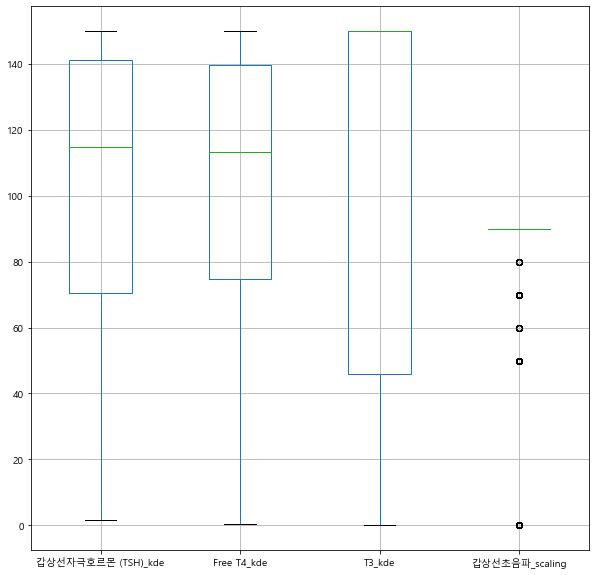

In [163]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['갑상선자극호르몬 (TSH)_kde', 'Free T4_kde', 'T3_kde', '갑상선초음파_scaling'])

<AxesSubplot:>

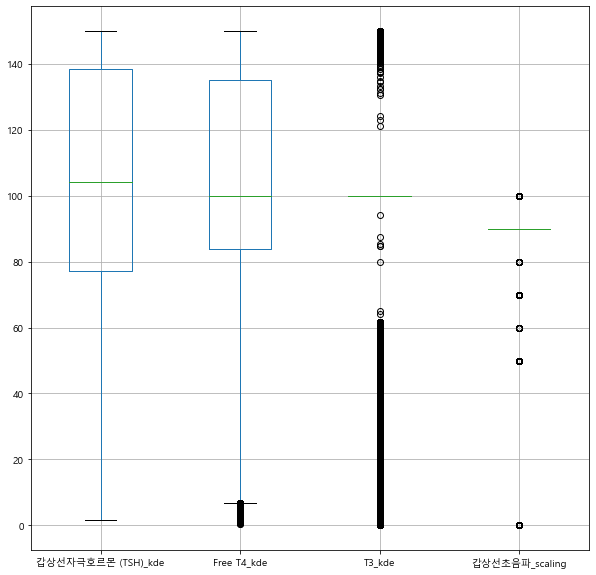

In [164]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['갑상선자극호르몬 (TSH)_kde', 'Free T4_kde', 'T3_kde', '갑상선초음파_scaling'])

## target Scaling

In [165]:
df_target['kde_mean'].min()

12.88

In [166]:
df_target['kde_mean'].max()

139.29

In [167]:
# df_target['target'] = ((df_target['kde_mean'] - df_target['kde_mean'].min()) / (df_target['kde_mean'].max() - df_target['kde_mean'].min()))
df_target['target'] = ((df_target['kde_mean'] - 0) / (200 - 0))

In [168]:
df_target['target'] = (df_target['target'] * 100) + 50

In [169]:
df_target['target'] = df_target['target'].round(0)

In [170]:
df_target['target'].value_counts().reset_index().sort_values('index')

,index,target
62,56.0,2
64,57.0,1
63,58.0,2
60,59.0,5
61,60.0,3
59,61.0,7
58,62.0,17
57,63.0,31
56,64.0,43
55,65.0,65


In [171]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target
count,1.154491e+06,1.154491e+06,1.154491e+06,1.154491e+06,1.154491e+06,1.018135e+06,937685.000000,296431.000000,1.154491e+06,1.154491e+06,1.154491e+06,1.154491e+06,1.154491e+06,1.154491e+06,1.154491e+06
mean,2.021882e+03,5.096192e+05,1.495099e+06,1.367441e+00,4.068328e+01,1.744095e+00,1.264554,30.281661,1.325647e+00,1.026184e+02,1.033459e+02,1.044321e+02,8.674353e+01,9.981351e+01,9.991565e+01
std,1.699659e+00,3.655318e+05,7.923804e+05,4.821081e-01,8.904280e+00,8.474770e-01,0.211969,49.866689,1.521893e+00,3.955449e+01,3.559208e+01,2.884144e+01,1.521893e+01,1.651134e+01,8.258413e+00
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000e+00,0.661000,0.000000,0.000000e+00,1.660000e+00,3.500000e-01,0.000000e+00,0.000000e+00,1.288000e+01,5.600000e+01
25%,2.021000e+03,2.215270e+05,6.833695e+05,1.000000e+00,3.400000e+01,1.110000e+00,1.110000,1.000000,1.000000e+00,7.728000e+01,8.377000e+01,1.000000e+02,9.000000e+01,9.015000e+01,9.500000e+01
50%,2.022000e+03,3.811800e+05,1.421074e+06,1.000000e+00,4.000000e+01,1.600000e+00,1.270000,1.200000,1.000000e+00,1.042900e+02,1.000000e+02,1.000000e+02,9.000000e+01,9.867000e+01,9.900000e+01
75%,2.023000e+03,8.380590e+05,2.175320e+06,2.000000e+00,4.800000e+01,2.250000e+00,1.410000,81.000000,1.000000e+00,1.386300e+02,1.351800e+02,1.000000e+02,9.000000e+01,1.115400e+02,1.060000e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,4.255000e+00,1.850000,205.000000,1.000000e+01,1.500100e+02,1.500400e+02,1.500000e+02,1.000000e+02,1.392900e+02,1.200000e+02


<AxesSubplot:>

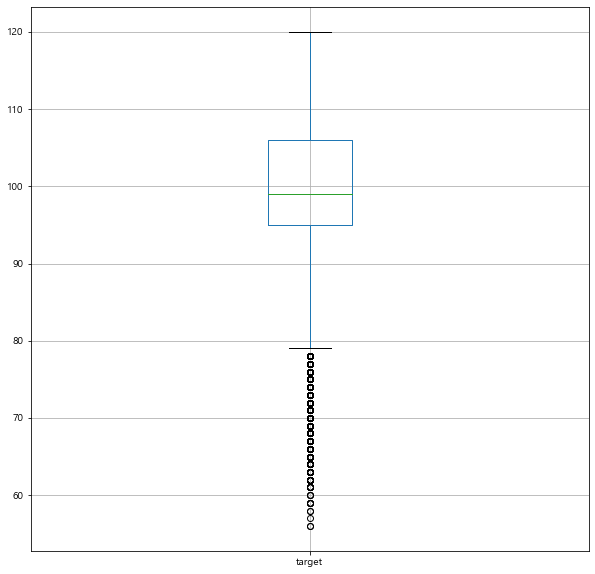

In [172]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

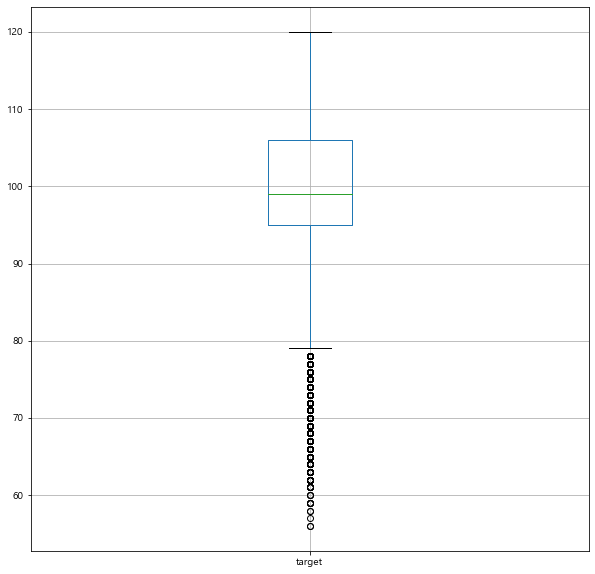

In [173]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

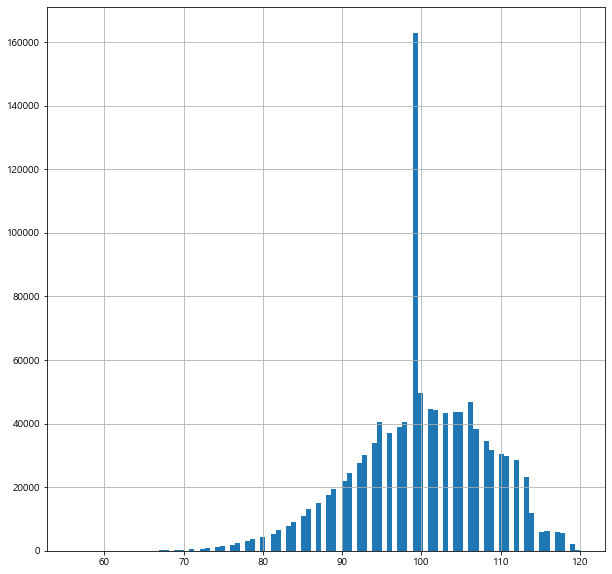

In [174]:
df_boxplot['target'].hist(bins=100)

## target 계산 결과

<AxesSubplot:xlabel='검진당시나이'>

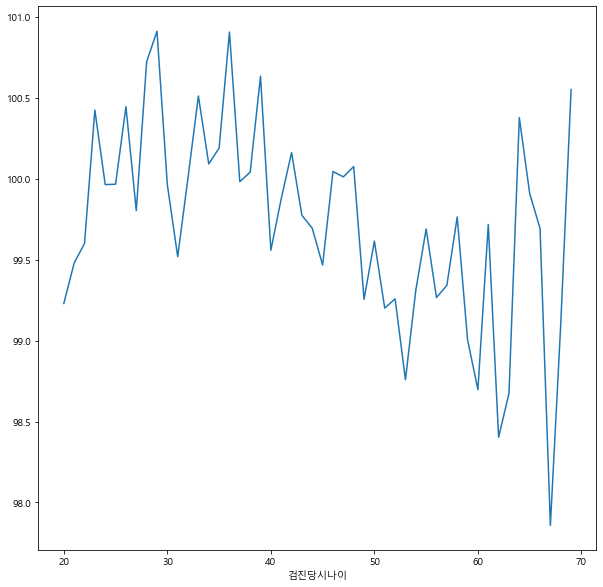

In [175]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').mean()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

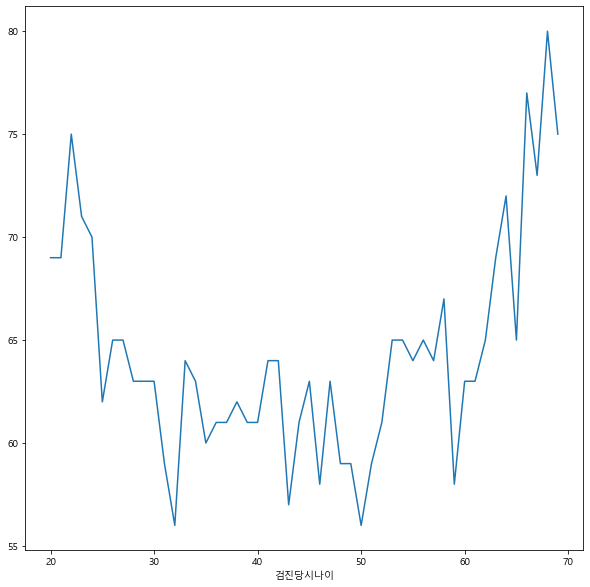

In [176]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').min()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

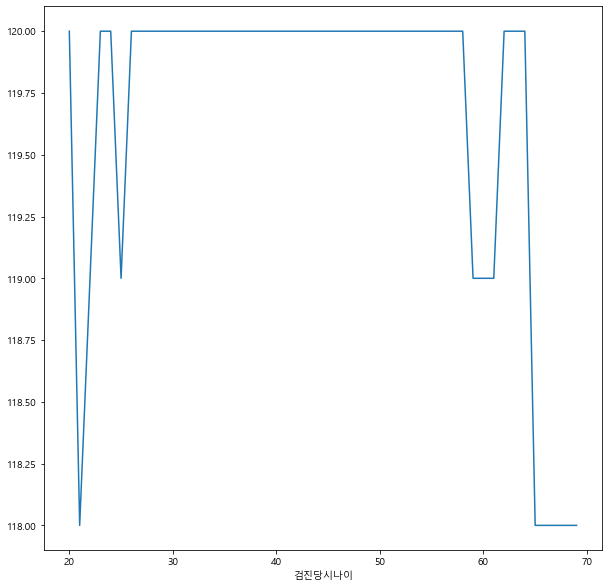

In [177]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').max()['target'].plot()

In [178]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target
303730,2010,609272,143,1,40,2.02,1.22,NaN,1.0,96.37,122.39,100.0,90.0,103.22,102.0
607262,2010,585711,154,1,52,0.93,1.36,NaN,1.0,120.68,140.61,100.0,90.0,115.37,108.0
511133,2010,593983,156,1,48,2.86,1.42,NaN,1.0,47.68,122.93,100.0,90.0,89.46,95.0
277243,2010,612330,185,1,39,1.41,1.45,NaN,0.0,145.07,136.13,100.0,100.0,123.20,112.0
24606,2010,645901,212,1,28,3.83,NaN,NaN,1.0,22.16,100.00,100.0,90.0,75.62,88.0


# 결측행 제거

In [179]:
# df_result.dropna(axis=0).info()

In [180]:
# df_result.dropna(axis=0, inplace=True)

# 남성 모델

In [181]:
df_target['SEX'].value_counts()

1    730284
2    424207
Name: SEX, dtype: int64

In [182]:
df_man = df_target[df_target['SEX'] == 1]
len(df_man)

730284

In [183]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target
303730,2010,609272,143,1,40,2.02,1.22,NaN,1.0,96.37,122.39,100.0,90.0,103.22,102.0
607262,2010,585711,154,1,52,0.93,1.36,NaN,1.0,120.68,140.61,100.0,90.0,115.37,108.0
511133,2010,593983,156,1,48,2.86,1.42,NaN,1.0,47.68,122.93,100.0,90.0,89.46,95.0
277243,2010,612330,185,1,39,1.41,1.45,NaN,0.0,145.07,136.13,100.0,100.0,123.20,112.0
24606,2010,645901,212,1,28,3.83,NaN,NaN,1.0,22.16,100.00,100.0,90.0,75.62,88.0


# 결측치 처리

## 결측치 삭제

In [184]:
# df_man.dropna(inplace=True)

In [185]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target
303730,2010,609272,143,1,40,2.02,1.22,NaN,1.0,96.37,122.39,100.0,90.0,103.22,102.0
607262,2010,585711,154,1,52,0.93,1.36,NaN,1.0,120.68,140.61,100.0,90.0,115.37,108.0
511133,2010,593983,156,1,48,2.86,1.42,NaN,1.0,47.68,122.93,100.0,90.0,89.46,95.0
277243,2010,612330,185,1,39,1.41,1.45,NaN,0.0,145.07,136.13,100.0,100.0,123.20,112.0
24606,2010,645901,212,1,28,3.83,NaN,NaN,1.0,22.16,100.00,100.0,90.0,75.62,88.0


## 결측치 평균으로 대체

In [186]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [187]:
# 나이로 group by, 결측치를 평균으로 대체
# df_man = df_man.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [188]:
target_cols

['갑상선자극호르몬 (TSH)', 'Free T4', 'T3', '갑상선초음파']

In [189]:
len(df_man)

730284

In [190]:
df_man.dropna(subset=target_cols, how='all', inplace=True)

In [191]:
len(df_man)

730284

In [192]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target
303730,2010,609272,143,1,40,2.02,1.22,NaN,1.0,96.37,122.39,100.0,90.0,103.22,102.0
607262,2010,585711,154,1,52,0.93,1.36,NaN,1.0,120.68,140.61,100.0,90.0,115.37,108.0
511133,2010,593983,156,1,48,2.86,1.42,NaN,1.0,47.68,122.93,100.0,90.0,89.46,95.0
277243,2010,612330,185,1,39,1.41,1.45,NaN,0.0,145.07,136.13,100.0,100.0,123.20,112.0
24606,2010,645901,212,1,28,3.83,NaN,NaN,1.0,22.16,100.00,100.0,90.0,75.62,88.0


## fillna

In [193]:
df_man.mean().round(2)

검진년도                     2021.91
UID                    515597.28
CU_REC_ID             1499616.33
SEX                         1.00
검진당시나이                     41.98
갑상선자극호르몬 (TSH)              1.72
Free T4                     1.29
T3                         30.78
갑상선초음파                      1.23
갑상선자극호르몬 (TSH)_kde        102.36
Free T4_kde               102.65
T3_kde                    104.61
갑상선초음파_scaling             87.70
kde_mean                   99.79
target                     99.90
dtype: float64

In [194]:
df_man.fillna(df_man.mean().round(2), inplace=True)

In [195]:
# df_man.fillna(0, inplace=True)

## IterativeImputer

In [196]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_target))
# df_impute.columns = df.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [197]:
# import time
# start = time.time()
# np_imputed = mice(df_man.values) # mice 학습시작
# df_man = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

# 중복 제거

In [198]:
len(df_man)

730284

In [199]:
len(df_man)

730284

In [200]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_man.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [201]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target
2287,2011,32,11757,1,24,2.65,1.19,30.780,5.0,61.81,81.02,100.00,50.0,72.95,86.0
670783,2021,50,642497,1,55,2.40,1.30,1.000,1.0,80.45,145.19,149.99,90.0,115.90,108.0
304335,2019,62,421626,1,40,3.37,1.37,1.180,0.0,21.12,145.85,150.00,100.0,101.28,101.0
338133,2020,62,565527,1,41,3.17,1.62,1.010,0.0,26.44,51.54,149.99,100.0,75.85,88.0
369045,2021,62,699357,1,42,2.26,1.46,0.907,0.0,80.02,121.05,149.98,100.0,111.02,106.0
400436,2022,62,1356310,1,43,1.96,1.59,1.050,0.0,108.20,65.74,150.00,100.0,103.27,102.0
431837,2023,62,2170394,1,44,1.80,1.57,1.050,1.0,127.49,62.97,150.00,90.0,105.85,103.0
584243,2019,67,410099,1,51,2.66,1.18,30.780,1.0,53.05,123.08,100.00,90.0,91.04,96.0
609428,2020,67,481109,1,52,2.00,1.12,30.780,1.0,92.37,109.66,100.00,90.0,98.44,99.0
633453,2021,67,643695,1,53,3.24,1.12,30.780,1.0,29.13,94.12,100.00,90.0,75.93,88.0


In [202]:
len(df_man)

730284

In [203]:
df_man[target_cols]

,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파
2287,2.65,1.19,30.780,5.0
670783,2.40,1.30,1.000,1.0
304335,3.37,1.37,1.180,0.0
338133,3.17,1.62,1.010,0.0
369045,2.26,1.46,0.907,0.0
...,...,...,...,...
51542,0.77,1.30,30.780,1.0
295392,1.72,1.29,30.780,1.0
11871,1.14,1.36,30.780,1.0
643020,1.33,1.37,30.780,1.0


## first만 남겨두고 중복 제거

In [204]:
df_man = df_man.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [205]:
len(df_man)

618223

In [206]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target
2287,2011,32,11757,1,24,2.65,1.19,30.780,5.0,61.81,81.02,100.00,50.0,72.95,86.0
670783,2021,50,642497,1,55,2.40,1.30,1.000,1.0,80.45,145.19,149.99,90.0,115.90,108.0
304335,2019,62,421626,1,40,3.37,1.37,1.180,0.0,21.12,145.85,150.00,100.0,101.28,101.0
338133,2020,62,565527,1,41,3.17,1.62,1.010,0.0,26.44,51.54,149.99,100.0,75.85,88.0
369045,2021,62,699357,1,42,2.26,1.46,0.907,0.0,80.02,121.05,149.98,100.0,111.02,106.0
400436,2022,62,1356310,1,43,1.96,1.59,1.050,0.0,108.20,65.74,150.00,100.0,103.27,102.0
431837,2023,62,2170394,1,44,1.80,1.57,1.050,1.0,127.49,62.97,150.00,90.0,105.85,103.0
584243,2019,67,410099,1,51,2.66,1.18,30.780,1.0,53.05,123.08,100.00,90.0,91.04,96.0
609428,2020,67,481109,1,52,2.00,1.12,30.780,1.0,92.37,109.66,100.00,90.0,98.44,99.0
633453,2021,67,643695,1,53,3.24,1.12,30.780,1.0,29.13,94.12,100.00,90.0,75.93,88.0


In [207]:
df_man.reset_index(drop=True, inplace=True)

In [208]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target
0,2011,32,11757,1,24,2.65,1.19,30.780,5.0,61.81,81.02,100.00,50.0,72.95,86.0
1,2021,50,642497,1,55,2.40,1.30,1.000,1.0,80.45,145.19,149.99,90.0,115.90,108.0
2,2019,62,421626,1,40,3.37,1.37,1.180,0.0,21.12,145.85,150.00,100.0,101.28,101.0
3,2020,62,565527,1,41,3.17,1.62,1.010,0.0,26.44,51.54,149.99,100.0,75.85,88.0
4,2021,62,699357,1,42,2.26,1.46,0.907,0.0,80.02,121.05,149.98,100.0,111.02,106.0


In [209]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618223 entries, 0 to 618222
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   검진년도                618223 non-null  int32  
 1   UID                 618223 non-null  int64  
 2   CU_REC_ID           618223 non-null  int64  
 3   SEX                 618223 non-null  int64  
 4   검진당시나이              618223 non-null  int64  
 5   갑상선자극호르몬 (TSH)      618223 non-null  float64
 6   Free T4             618223 non-null  float64
 7   T3                  618223 non-null  float64
 8   갑상선초음파              618223 non-null  float64
 9   갑상선자극호르몬 (TSH)_kde  618223 non-null  float64
 10  Free T4_kde         618223 non-null  float64
 11  T3_kde              618223 non-null  float64
 12  갑상선초음파_scaling      618223 non-null  float64
 13  kde_mean            618223 non-null  float64
 14  target              618223 non-null  float64
dtypes: float64(10), int32(1), int64(4)

# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

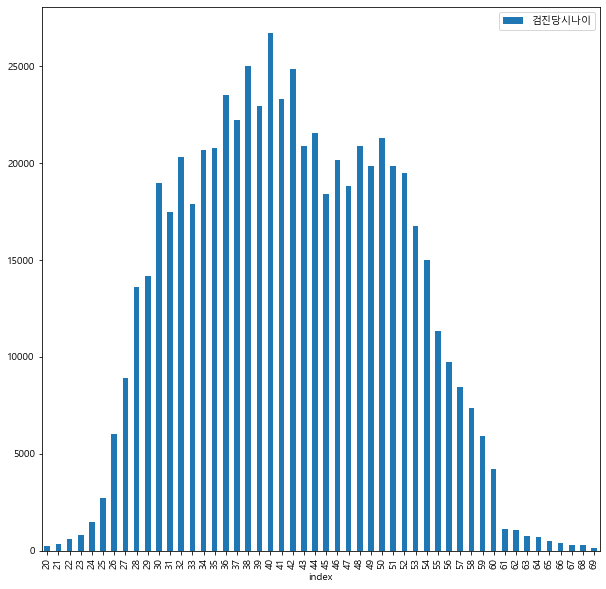

In [210]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [211]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
48,20,235
45,21,320
42,22,586
39,23,792
36,24,1481
35,25,2714
32,26,6033
29,27,8881
26,28,13585
25,29,14166


# 검진항목 시각화

In [212]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target
count,618223.000000,6.182230e+05,6.182230e+05,618223.0,618223.000000,618223.000000,618223.000000,618223.000000,618223.000000,618223.000000,618223.000000,618223.000000,618223.000000,618223.000000,618223.000000
mean,2021.852806,5.113049e+05,1.495109e+06,1.0,41.954728,1.719787,1.291459,30.808760,1.231886,102.285303,102.250477,104.683961,87.681144,99.660234,99.839354
std,1.761110,3.650271e+05,8.079200e+05,0.0,8.849047,0.781497,0.195184,26.395172,1.444580,39.773180,35.710114,29.543470,14.445799,16.481390,8.244036
min,2010.000000,3.200000e+01,1.430000e+02,1.0,20.000000,0.000000,0.661000,0.000000,0.000000,1.660000,0.350000,0.020000,0.000000,12.910000,56.000000
25%,2021.000000,2.226630e+05,6.623830e+05,1.0,35.000000,1.160000,1.190000,30.780000,0.000000,76.660000,79.770000,100.000000,90.000000,89.970000,95.000000
50%,2022.000000,3.821610e+05,1.420322e+06,1.0,42.000000,1.710000,1.290000,30.780000,1.000000,103.940000,100.000000,100.000000,90.000000,98.370000,99.000000
75%,2023.000000,8.403270e+05,2.191509e+06,1.0,49.000000,2.100000,1.410000,30.780000,1.000000,138.430000,134.340000,100.000000,100.000000,111.290000,106.000000
max,2024.000000,1.473645e+06,2.871445e+06,1.0,69.000000,4.255000,1.850000,205.000000,10.000000,150.000000,150.040000,150.000000,100.000000,139.290000,120.000000


<AxesSubplot:xlabel='검진당시나이'>

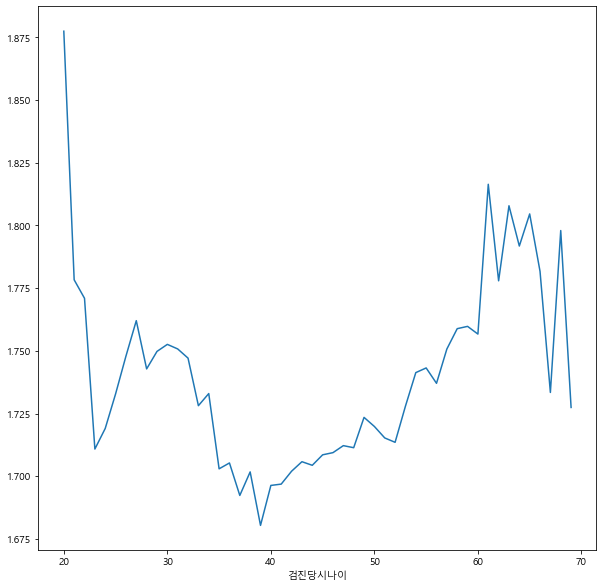

In [213]:
df_man.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

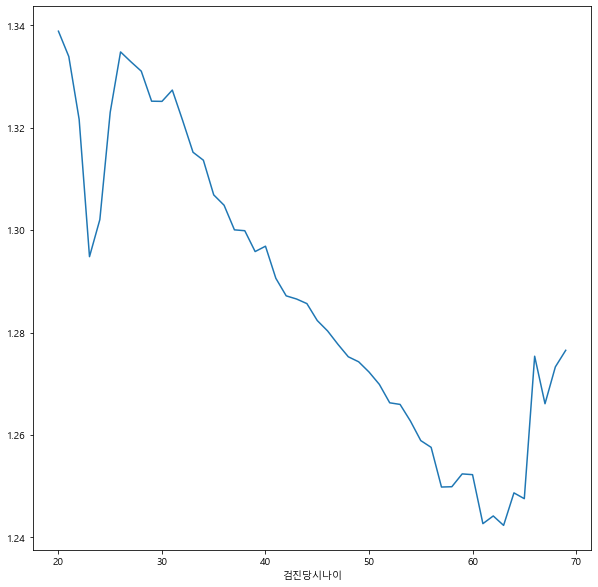

In [214]:
df_man.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

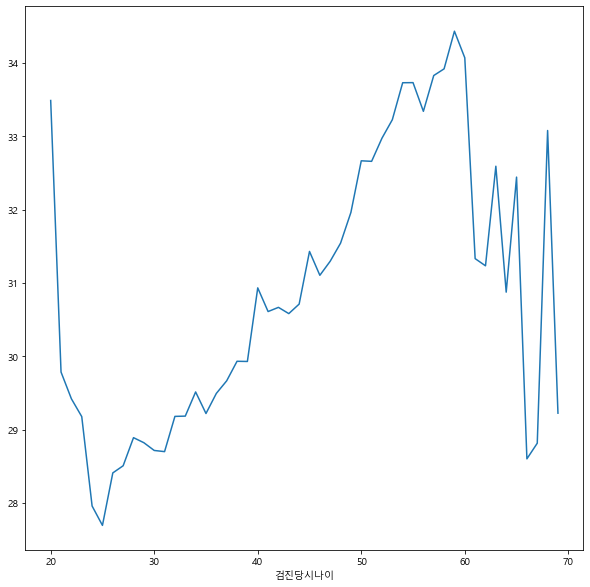

In [215]:
df_man.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

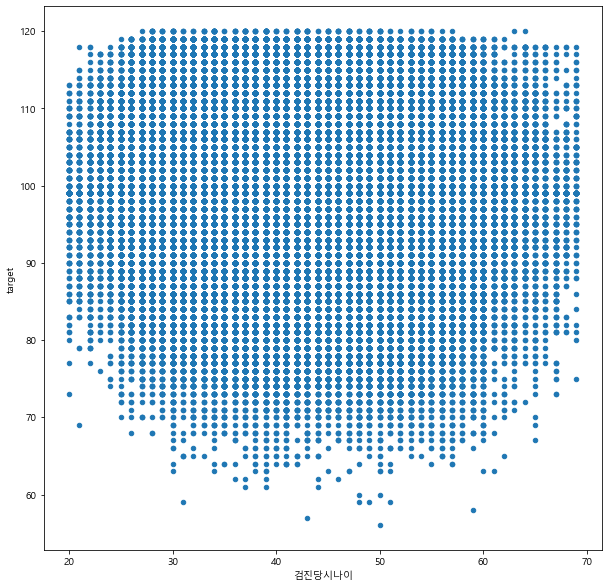

In [216]:
df_man.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

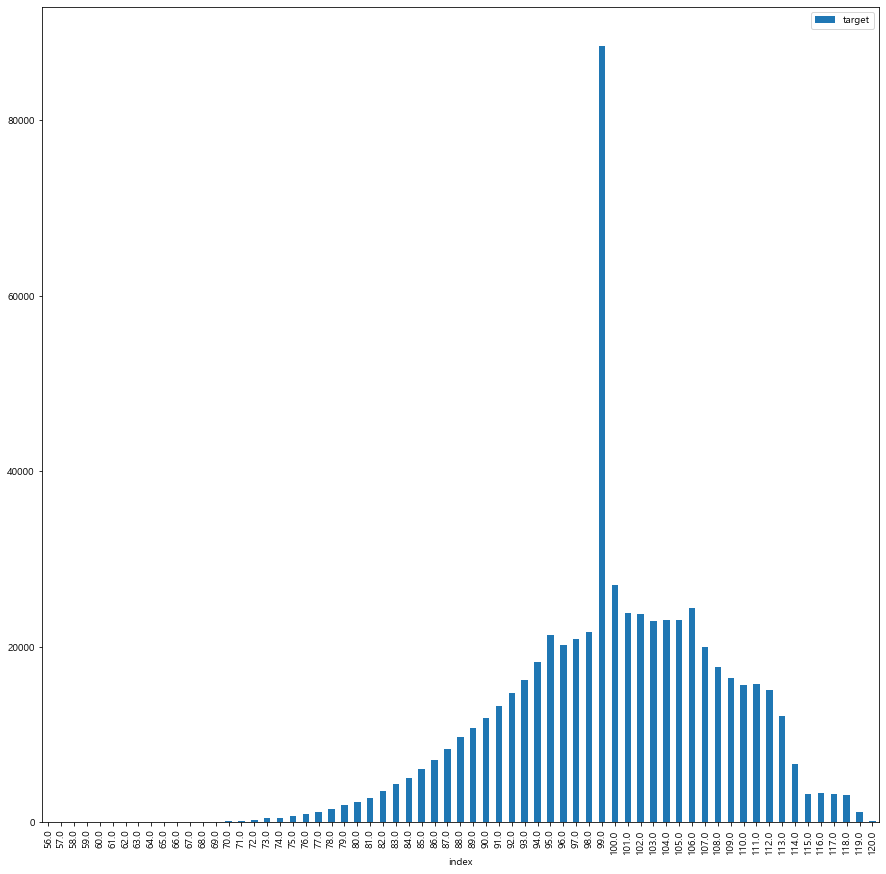

In [217]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [218]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
62,56.0,1
63,57.0,1
64,58.0,1
59,59.0,4
61,60.0,2
60,61.0,3
58,62.0,5
57,63.0,13
56,64.0,21
55,65.0,30


In [219]:
df_man_sampling = pd.DataFrame()

# for target in range(int(df_man['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_man[df_man['target'] == target])
    right_len = len(df_man[df_man['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == 100]])                    

In [220]:
# df_man = df_man_sampling.copy()

<AxesSubplot:xlabel='index'>

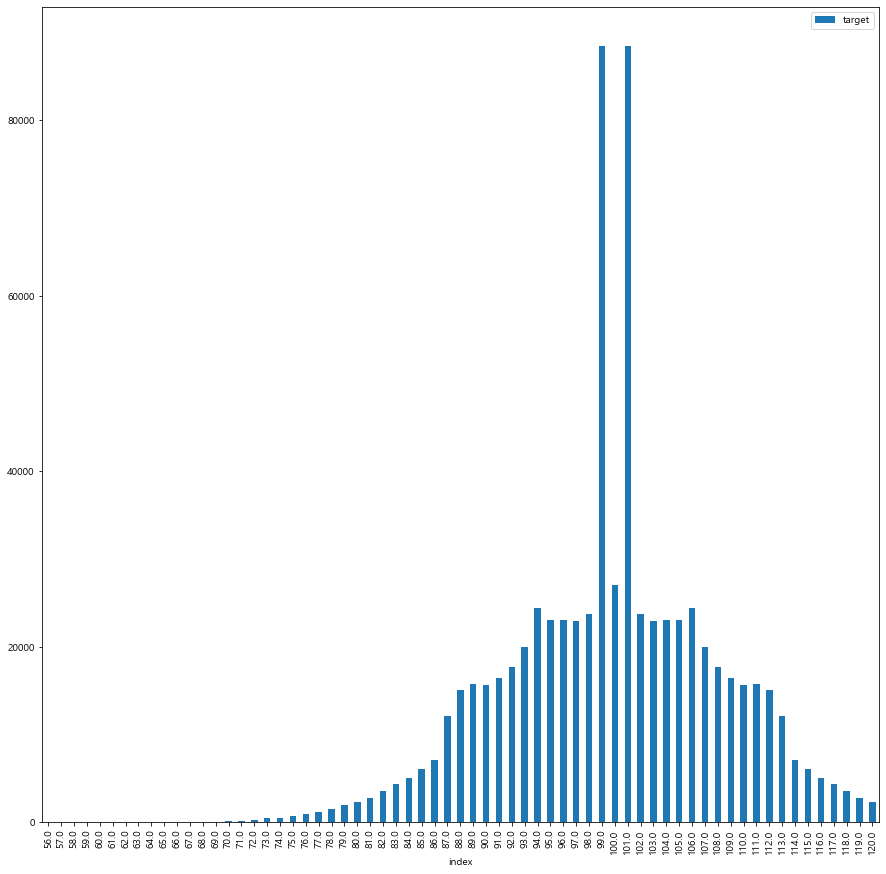

In [221]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [222]:
df_man_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
64,56.0,1
63,57.0,1
62,58.0,1
59,59.0,4
61,60.0,2
60,61.0,3
58,62.0,5
57,63.0,13
56,64.0,21
55,65.0,30


# 나이별 확인하기

In [223]:
# target = 'target'

In [224]:
# df_man_sample = None
                 
# for idx in range(int(df_man[target].min()), int(df_man[target].max() + 1)):    
#     if len(df_man[df_man[target] == idx]) > 0:
#         temp_ = df_man[df_man[target] == idx].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#         df_man_sample = pd.concat([df_man_sample, temp_])

# df_man_sample.sample(frac=1).reset_index(drop=True, inplace=True)

In [225]:
# df_man = df_man_sample

In [226]:
# int(df_man['검진당시나이'].value_counts().mean())

In [227]:
# df_man['검진당시나이'].min()

In [228]:
# df_man['검진당시나이'].max()

In [229]:
# df_man.columns

In [230]:
# df_temp = None
# # sample_len = int(df_man['검진당시나이'].value_counts().mean())
# # sample_len = 1000
                 
# for age in range(df_man['검진당시나이'].min(), df_man['검진당시나이'].max()):
#     temp_ = df_man[df_man['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [231]:
# df_temp.info()

In [232]:
# df_temp.reset_index(drop=True, inplace=True)

In [233]:
# df_man = df_temp.copy()

In [234]:
# df_man['검진당시나이'].value_counts()

In [235]:
# df_man[df_man['검진당시나이']==38]

In [236]:
# df_man[df_man['검진당시나이']==38]['UID'].value_counts()

# model train

In [237]:
df_man.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '갑상선자극호르몬 (TSH)',
       'Free T4', 'T3', '갑상선초음파', '갑상선자극호르몬 (TSH)_kde', 'Free T4_kde',
       'T3_kde', '갑상선초음파_scaling', 'kde_mean', 'target'],
      dtype='object')

In [238]:
# train_columns = [
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)',
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                  ]

In [239]:
target_cols

['갑상선자극호르몬 (TSH)', 'Free T4', 'T3', '갑상선초음파']

In [240]:
train_columns = target_cols.copy()

In [241]:
train_columns.insert(0, '검진당시나이')

In [242]:
train_columns

['검진당시나이', '갑상선자극호르몬 (TSH)', 'Free T4', 'T3', '갑상선초음파']

In [243]:
target_cols

['갑상선자극호르몬 (TSH)', 'Free T4', 'T3', '갑상선초음파']

In [244]:
target_col = 'target'

## Min Max Scaling

In [245]:
from sklearn.preprocessing import MinMaxScaler

In [246]:
scaling_bool

False

In [247]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_man_sampling[train_columns])
    df_man_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

## train_test_split

In [248]:
if scaling_bool:
    X_train, X_test, y_train, y_test = train_test_split(df_man_scaled[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)
else :
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [249]:
# model = LinearRegression()

In [250]:
# model.fit(X_train, y_train)

In [251]:
# model.intercept_

In [252]:
# model.coef_

## Randomized SearchCV, 파라미터 튜닝

In [253]:
model = XGBRegressor()

In [254]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [255]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [256]:
import time
start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search)) # best parameter

RandomizedSearchCV took 2454.19 seconds for 10 candidates parameter settings.


In [257]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.5,
 'booster': 'gbtree'}

In [258]:
# best score
random_search.best_score_

-0.5843120462947162

In [259]:
model = random_search.best_estimator_
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.5,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [260]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [261]:
# model = build_model()

In [262]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [263]:
# model.summary()

In [264]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [265]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [266]:
# plot_history(history)

## pyTorch 신경망

In [267]:
np.shape(X_train)[1]

5

In [268]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [269]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [270]:
# epochs = 1000

In [271]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [272]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [273]:
# plt.plot(losses)

## coef 계산

In [274]:
# df_coef = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model.coef_).reset_index(drop=True)], axis=1)

In [275]:
# df_coef.columns = ['검사항목', 'coef']

In [276]:
# df_coef['coef'] = df_coef['coef'].round(4)

In [277]:
# df_coef['abs_coef'] = df_coef['coef'].abs()

In [278]:
# df_coef.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [279]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)

In [280]:
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)

In [281]:
# slr = LinearRegression()

In [282]:
# slr.fit(X_train_poly, y_train)

In [283]:
# np.shape(X_train)

In [284]:
# np.shape(X_train_poly)

In [285]:
# np.shape(X_test)

In [286]:
# np.shape(X_test_poly)

In [287]:
# y_pred_poly = slr.predict(X_test_poly)

In [288]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test, y_pred_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test, y_pred_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_poly)))

In [289]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred_poly)

# model save

In [290]:
import pickle
with open(model_path_man,'wb') as f:
    pickle.dump(model, f)

In [291]:
import pickle
with open(model_path_man, 'rb') as f:
    model = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [292]:
pyTorch_bool

False

In [293]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model.eval()
        y_pred = model(X_test)
        y_pred = y_pred.numpy()

## XGBRegressor

In [294]:
XGB_bool

True

In [295]:
if XGB_bool:
    y_pred = model.predict(X_test)

In [296]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test, y_pred))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test, y_pred))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 0.4272343443480556
MSE : 0.5739770882003732
RMSE : 0.7576127560966573


In [297]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9913001701085051

In [298]:
model.score(X_test, y_test)

0.9913001701085051

## feature importance

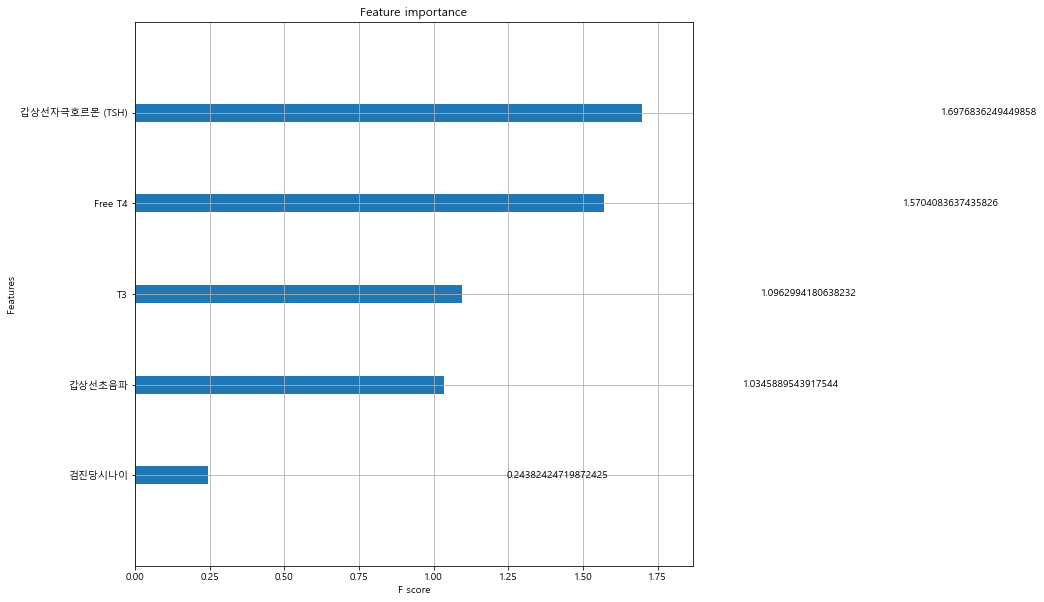

In [299]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model, importance_type='gain')

In [300]:
model.feature_importances_

array([0.04320977, 0.30085814, 0.27830282, 0.19428273, 0.1833466 ],
      dtype=float32)

In [301]:
df_feature = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model.feature_importances_)], axis=1)
df_feature.columns = ['columns', 'feature_importance']

In [302]:
df_feature.sort_values('feature_importance', ascending=False)

,columns,feature_importance
1,갑상선자극호르몬 (TSH),0.300858
2,Free T4,0.278303
3,T3,0.194283
4,갑상선초음파,0.183347
0,검진당시나이,0.043210


# 실제지수 - 예측지수 결과

In [303]:
pd.DataFrame(y_test).reset_index(drop=True)

,target
0,99.0
1,76.0
2,111.0
3,95.0
4,96.0
...,...
183964,92.0
183965,109.0
183966,96.0
183967,104.0


In [304]:
pd.DataFrame(y_pred).reset_index(drop=True)

,0
0,99.554825
1,75.864288
2,105.468010
3,94.839050
4,94.904236
...,...
183964,92.327103
183965,108.823601
183966,95.417534
183967,103.558655


In [305]:
df_test = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_pred).reset_index(drop=True)], axis=1)

In [306]:
df_test.head()

,target,0
0,99.0,99.554825
1,76.0,75.864288
2,111.0,105.468010
3,95.0,94.839050
4,96.0,94.904236


In [307]:
df_test.columns

Index(['target', 0], dtype='object')

In [308]:
df_test.columns = ['실제지수', '예측지수']

In [309]:
df_test['diff'] = df_test['예측지수'] - df_test['실제지수']

In [310]:
df_test.head()

,실제지수,예측지수,diff
0,99.0,99.554825,0.554825
1,76.0,75.864288,-0.135712
2,111.0,105.468010,-5.531990
3,95.0,94.839050,-0.160950
4,96.0,94.904236,-1.095764


In [311]:
df_test['diff_int'] = df_test['diff'].round(0)

In [312]:
len(df_test)

183969

In [313]:
df_test.head()

,실제지수,예측지수,diff,diff_int
0,99.0,99.554825,0.554825,1.0
1,76.0,75.864288,-0.135712,-0.0
2,111.0,105.468010,-5.531990,-6.0
3,95.0,94.839050,-0.160950,-0.0
4,96.0,94.904236,-1.095764,-1.0


<AxesSubplot:>

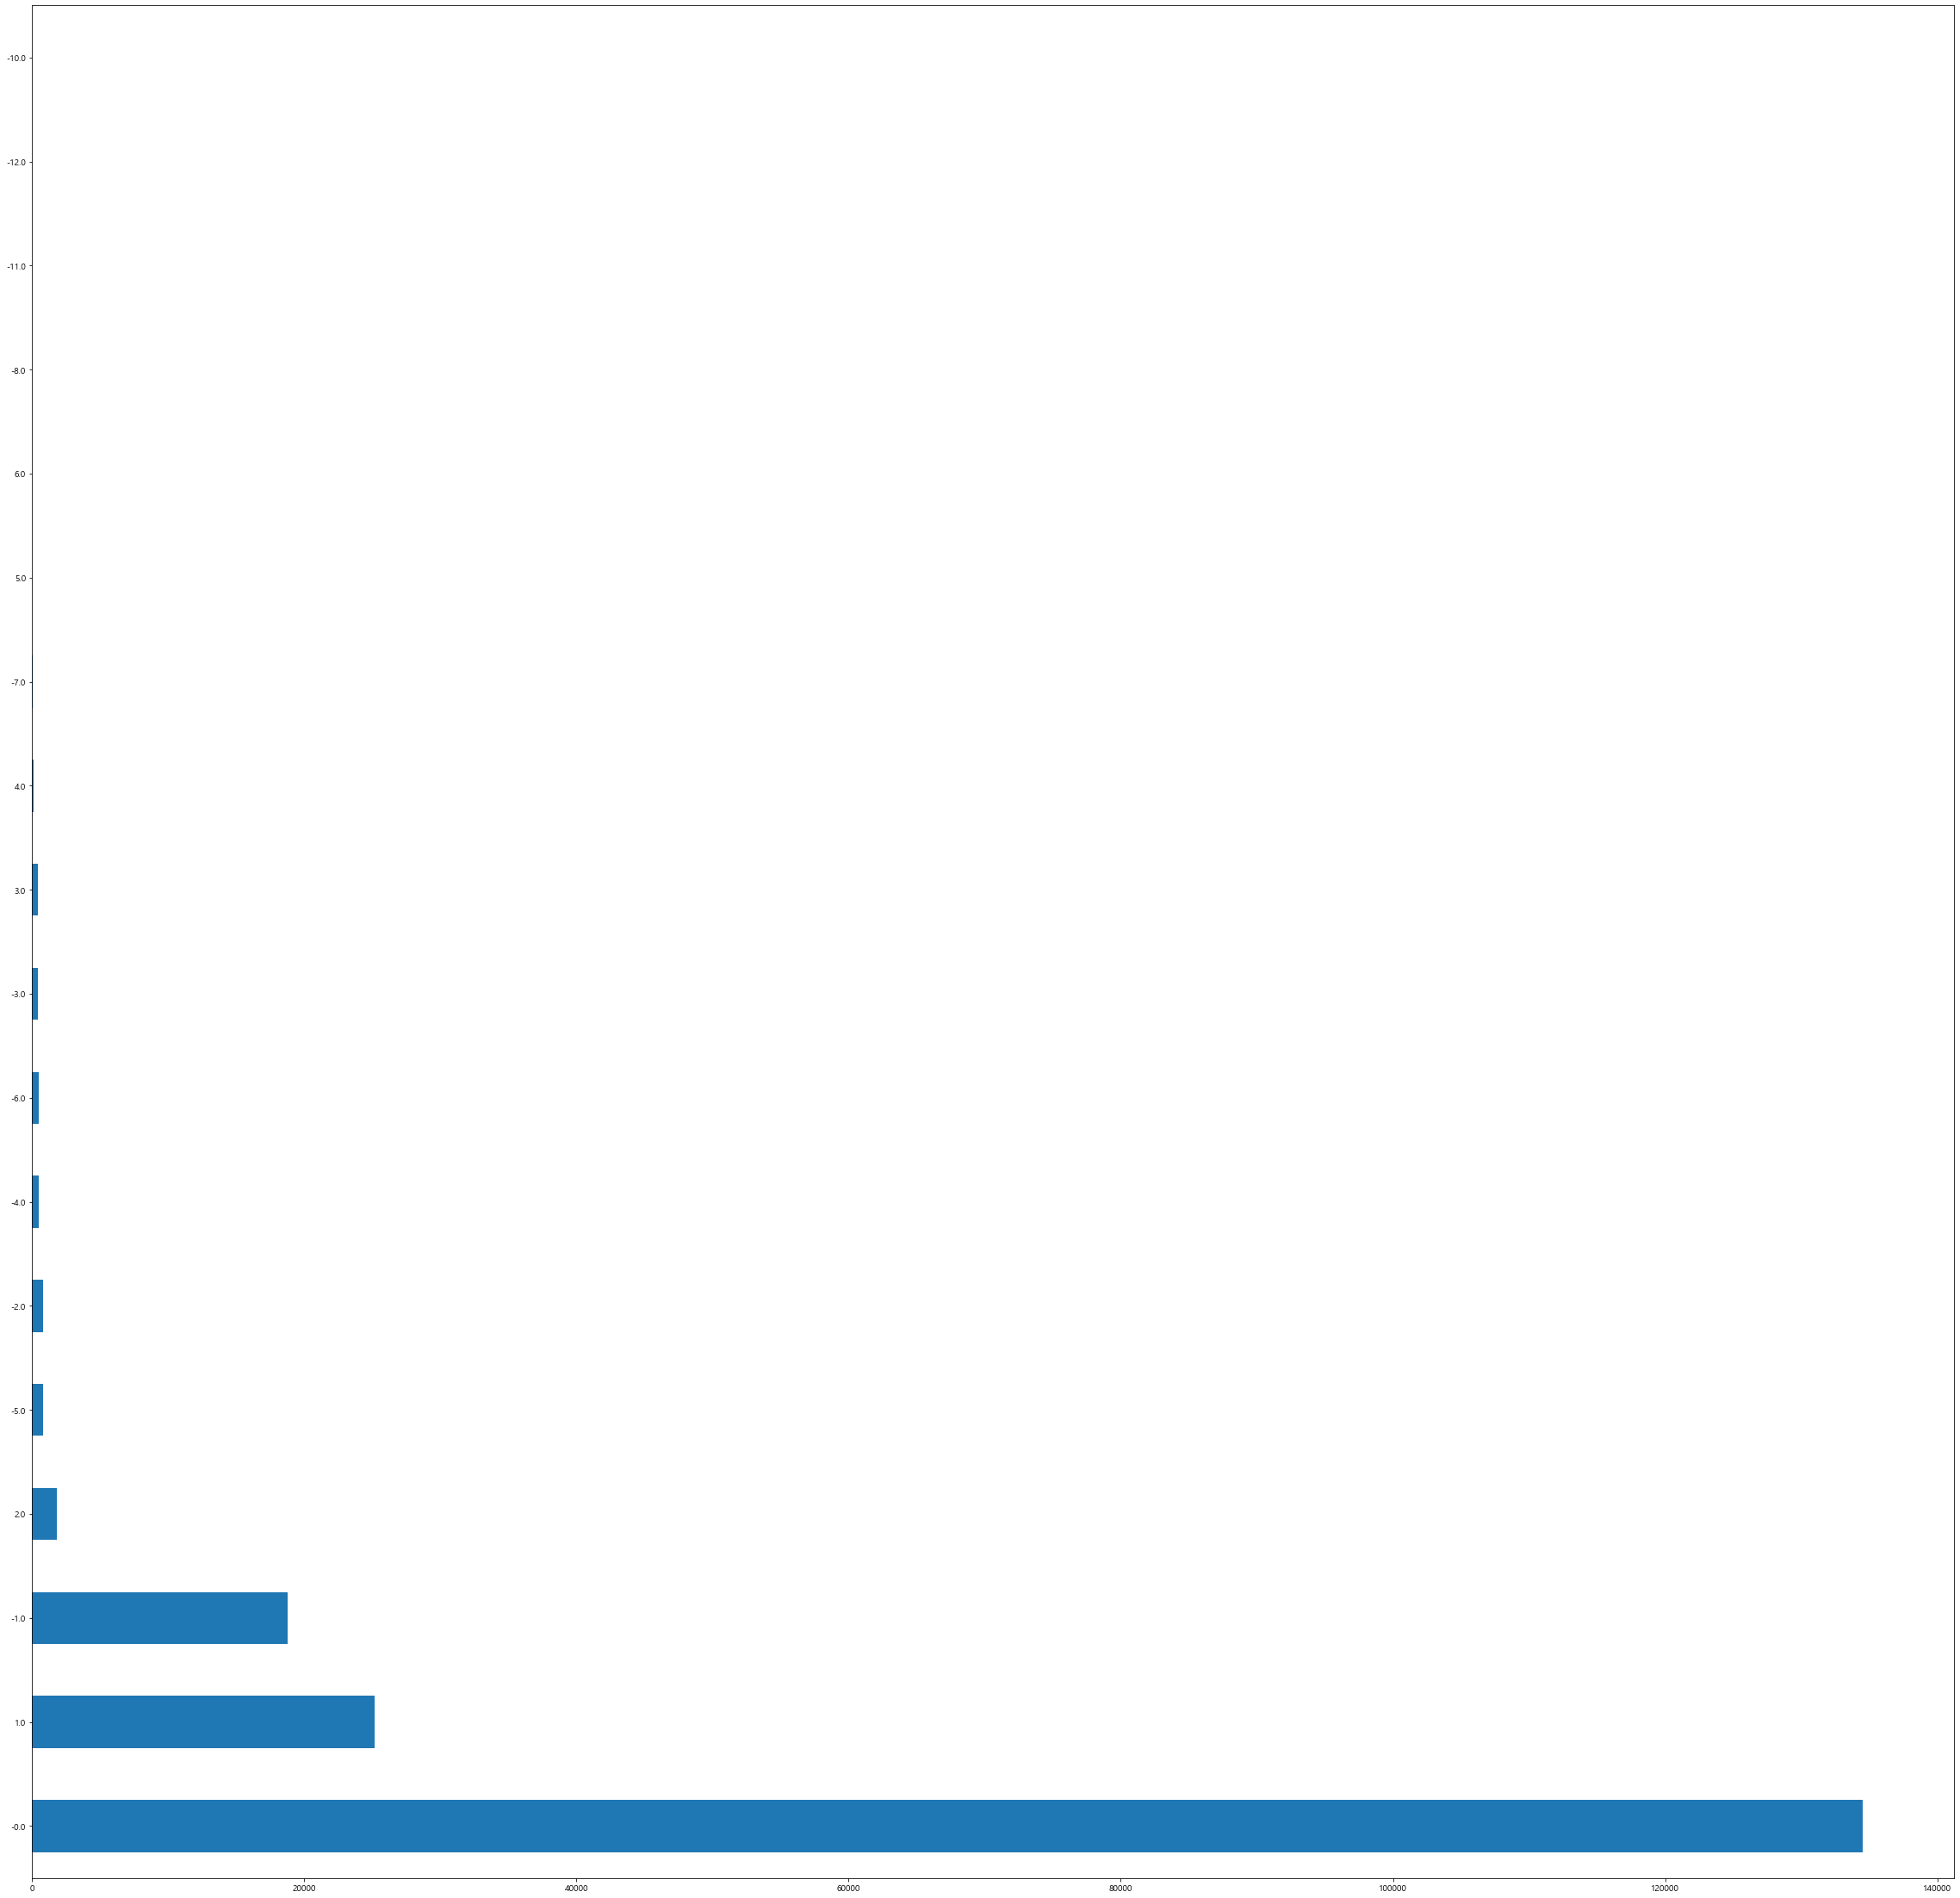

In [314]:
plt.figure(figsize=(40, 40))
df_test['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_남자.png')

In [315]:
df_test['diff_int'].value_counts(ascending=False)

-0.0     134499
 1.0      25154
-1.0      18789
 2.0       1805
-5.0        812
-2.0        790
-4.0        487
-6.0        485
-3.0        463
 3.0        441
 4.0        134
-7.0         69
 5.0         25
 6.0          7
-8.0          4
-11.0         3
-12.0         1
-10.0         1
Name: diff_int, dtype: int64

In [316]:
df_test['예측지수'].round(0).value_counts()

99.0     22295
101.0    18657
102.0     8256
100.0     8010
98.0      5969
95.0      5867
106.0     5829
97.0      5814
103.0     5794
94.0      5774
105.0     5739
107.0     5732
96.0      5708
104.0     5561
93.0      5171
108.0     4724
92.0      4434
91.0      4121
90.0      4023
89.0      3927
109.0     3880
110.0     3768
111.0     3751
88.0      3674
112.0     3662
113.0     3064
87.0      2966
114.0     1822
86.0      1793
85.0      1516
115.0     1437
84.0      1341
116.0     1282
83.0      1046
117.0     1028
118.0      934
82.0       895
119.0      708
81.0       706
80.0       579
120.0      560
79.0       512
78.0       404
77.0       296
76.0       251
75.0       196
74.0       148
73.0       122
72.0        74
71.0        37
70.0        29
68.0        24
69.0        21
67.0        13
64.0         9
65.0         5
66.0         4
63.0         3
60.0         1
61.0         1
62.0         1
59.0         1
Name: 예측지수, dtype: int64

# 예측 나이 분포

In [317]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_train_pred = model(X_train)
        X_train_pred = X_train_pred.numpy()

    df_train = pd.DataFrame(X_train_pred).reset_index(drop=True)
    y_test = pd.DataFrame(y_test.numpy())

In [318]:
if XGB_bool:
    df_train = pd.DataFrame(model.predict(X_train)).reset_index(drop=True)

In [319]:
# df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [320]:
df_plot = pd.DataFrame(y_test.value_counts())

In [321]:
df_plot.columns = ['count']

In [322]:
df_plot.reset_index(inplace=True)

In [323]:
df_plot = df_plot.sort_values('index', ascending=True)

In [324]:
df_plot

,index,count
59,59.0,1
57,61.0,2
56,63.0,3
54,64.0,9
55,65.0,6
58,66.0,2
53,67.0,14
51,68.0,22
52,69.0,18
50,70.0,38


In [325]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

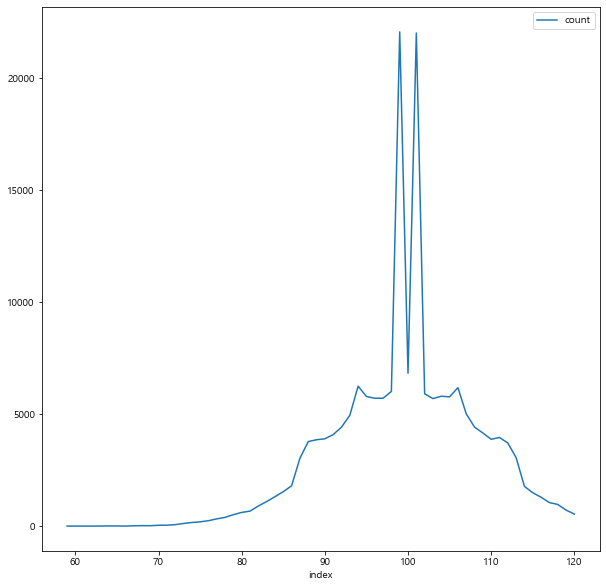

In [326]:
df_plot.plot()

In [327]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_test_pred = model(X_test)
        X_test_pred = X_test_pred.numpy()
    df_test = pd.DataFrame(X_test_pred).reset_index(drop=True)

In [328]:
if XGB_bool:
    df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [329]:
df_plot = pd.DataFrame(df_test.round(0).value_counts())

In [330]:
df_plot.columns = ['count']

In [331]:
df_plot.reset_index(inplace=True)

In [332]:
df_plot = df_plot.sort_values(0, ascending=True)

In [333]:
df_plot.set_index(0, inplace=True)

In [334]:
df_plot

,count
0,
59.0,1
60.0,1
61.0,1
62.0,1
63.0,3
64.0,9
65.0,5
66.0,4
67.0,13


<AxesSubplot:xlabel='0'>

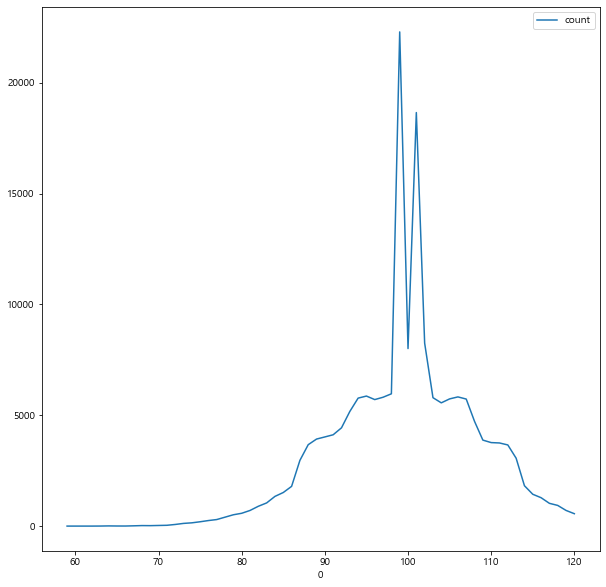

In [335]:
df_plot.plot()

# 시각화

In [336]:
# model.coef_

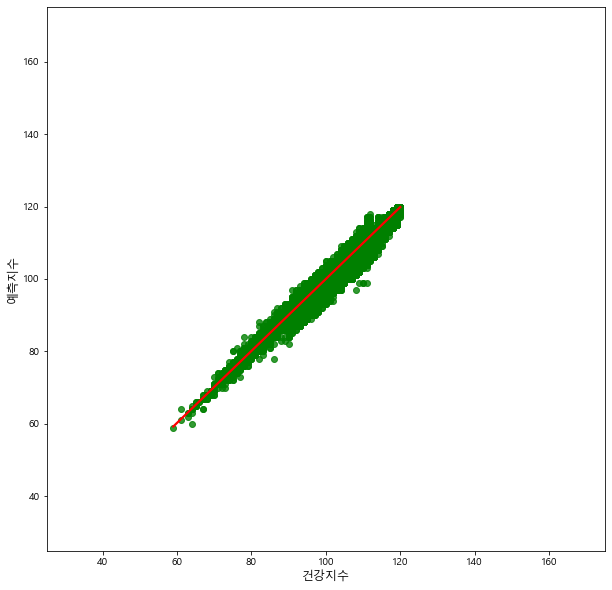

In [337]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), df_test.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 남성 데이터 전체 계산

In [338]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target
0,2011,32,11757,1,24,2.65,1.19,30.780,5.0,61.81,81.02,100.00,50.0,72.95,86.0
1,2021,50,642497,1,55,2.40,1.30,1.000,1.0,80.45,145.19,149.99,90.0,115.90,108.0
2,2019,62,421626,1,40,3.37,1.37,1.180,0.0,21.12,145.85,150.00,100.0,101.28,101.0
3,2020,62,565527,1,41,3.17,1.62,1.010,0.0,26.44,51.54,149.99,100.0,75.85,88.0
4,2021,62,699357,1,42,2.26,1.46,0.907,0.0,80.02,121.05,149.98,100.0,111.02,106.0


In [339]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618223 entries, 0 to 618222
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   검진년도                618223 non-null  int32  
 1   UID                 618223 non-null  int64  
 2   CU_REC_ID           618223 non-null  int64  
 3   SEX                 618223 non-null  int64  
 4   검진당시나이              618223 non-null  int64  
 5   갑상선자극호르몬 (TSH)      618223 non-null  float64
 6   Free T4             618223 non-null  float64
 7   T3                  618223 non-null  float64
 8   갑상선초음파              618223 non-null  float64
 9   갑상선자극호르몬 (TSH)_kde  618223 non-null  float64
 10  Free T4_kde         618223 non-null  float64
 11  T3_kde              618223 non-null  float64
 12  갑상선초음파_scaling      618223 non-null  float64
 13  kde_mean            618223 non-null  float64
 14  target              618223 non-null  float64
dtypes: float64(10), int32(1), int64(4)

In [340]:
df_man[df_man['UID'] == 168996]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target


In [341]:
train_columns

['검진당시나이', '갑상선자극호르몬 (TSH)', 'Free T4', 'T3', '갑상선초음파']

In [342]:
if scaling_bool:
    df_pred = df_man_scaled.copy()
else:
    df_pred = df_man.copy()

In [343]:
len(df_pred)

618223

In [344]:
df_pred.reset_index(drop=True, inplace=True)

In [345]:
X_test

,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파
79870,31,0.980,1.61,30.78,1.0
520207,32,3.710,1.65,30.78,5.0
138859,42,1.670,1.29,30.78,1.0
60440,52,1.700,1.60,30.78,1.0
437532,45,0.545,1.46,2.10,5.0
...,...,...,...,...,...
169433,20,3.780,1.40,121.20,0.0
536391,47,0.828,1.27,30.78,0.0
30782,52,2.180,1.39,30.78,5.0
153588,30,1.090,1.41,116.00,0.0


In [346]:
df_pred.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '갑상선자극호르몬 (TSH)',
       'Free T4', 'T3', '갑상선초음파', '갑상선자극호르몬 (TSH)_kde', 'Free T4_kde',
       'T3_kde', '갑상선초음파_scaling', 'kde_mean', 'target'],
      dtype='object')

In [347]:
df_pred[train_columns]

,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파
0,24,2.65,1.19,30.780,5.0
1,55,2.40,1.30,1.000,1.0
2,40,3.37,1.37,1.180,0.0
3,41,3.17,1.62,1.010,0.0
4,42,2.26,1.46,0.907,0.0
...,...,...,...,...,...
618218,29,0.77,1.30,30.780,1.0
618219,39,1.72,1.29,30.780,1.0
618220,26,1.14,1.36,30.780,1.0
618221,53,1.33,1.37,30.780,1.0


In [348]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        pred_data = model(torch.Tensor(df_pred[train_columns].to_numpy()))
        pred_data = pred_data.numpy()

In [349]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_pred[train_columns])

In [350]:
pred_data = pred_data.round(0)

In [351]:
pred_data

array([ 86., 108., 101., ..., 112., 109.,  99.], dtype=float32)

In [352]:
df_output = pd.concat([df_pred, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [353]:
if scaling_bool:
    df_output = pd.concat([df_man[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output], axis=1)

In [354]:
df_output.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target,예측지수
0,2011,32,11757,1,24,2.65,1.19,30.780,5.0,61.81,81.02,100.00,50.0,72.95,86.0,86.0
1,2021,50,642497,1,55,2.40,1.30,1.000,1.0,80.45,145.19,149.99,90.0,115.90,108.0,108.0
2,2019,62,421626,1,40,3.37,1.37,1.180,0.0,21.12,145.85,150.00,100.0,101.28,101.0,101.0
3,2020,62,565527,1,41,3.17,1.62,1.010,0.0,26.44,51.54,149.99,100.0,75.85,88.0,87.0
4,2021,62,699357,1,42,2.26,1.46,0.907,0.0,80.02,121.05,149.98,100.0,111.02,106.0,106.0
5,2022,62,1356310,1,43,1.96,1.59,1.050,0.0,108.20,65.74,150.00,100.0,103.27,102.0,101.0
6,2023,62,2170394,1,44,1.80,1.57,1.050,1.0,127.49,62.97,150.00,90.0,105.85,103.0,102.0
7,2019,67,410099,1,51,2.66,1.18,30.780,1.0,53.05,123.08,100.00,90.0,91.04,96.0,96.0
8,2020,67,481109,1,52,2.00,1.12,30.780,1.0,92.37,109.66,100.00,90.0,98.44,99.0,99.0
9,2021,67,643695,1,53,3.24,1.12,30.780,1.0,29.13,94.12,100.00,90.0,75.93,88.0,88.0


## 예측지수 성능평가

In [355]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['target'], df_output['예측지수'])

0.3410581618606878

# target으로 나이 계산

In [356]:
df_output['예측나이'] = ((100 - df_output['예측지수']) / 5) + df_output['검진당시나이']
df_output['예측나이'] = df_output['예측나이'].round(2)

In [357]:
df_output.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,2.650,1.19,30.780,5.0,61.81,81.02,100.00,50.0,72.95,86.0,86.0,26.8
1,2021,50,642497,1,55,2.400,1.30,1.000,1.0,80.45,145.19,149.99,90.0,115.90,108.0,108.0,53.4
2,2019,62,421626,1,40,3.370,1.37,1.180,0.0,21.12,145.85,150.00,100.0,101.28,101.0,101.0,39.8
3,2020,62,565527,1,41,3.170,1.62,1.010,0.0,26.44,51.54,149.99,100.0,75.85,88.0,87.0,43.6
4,2021,62,699357,1,42,2.260,1.46,0.907,0.0,80.02,121.05,149.98,100.0,111.02,106.0,106.0,40.8
5,2022,62,1356310,1,43,1.960,1.59,1.050,0.0,108.20,65.74,150.00,100.0,103.27,102.0,101.0,42.8
6,2023,62,2170394,1,44,1.800,1.57,1.050,1.0,127.49,62.97,150.00,90.0,105.85,103.0,102.0,43.6
7,2019,67,410099,1,51,2.660,1.18,30.780,1.0,53.05,123.08,100.00,90.0,91.04,96.0,96.0,51.8
8,2020,67,481109,1,52,2.000,1.12,30.780,1.0,92.37,109.66,100.00,90.0,98.44,99.0,99.0,52.2
9,2021,67,643695,1,53,3.240,1.12,30.780,1.0,29.13,94.12,100.00,90.0,75.93,88.0,88.0,55.4


## 예측나이 성능평가

In [358]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['검진당시나이'], df_output['예측나이'])

1.271998291878497

# 최종 산출

In [359]:
df_output.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,2.65,1.19,30.780,5.0,61.81,81.02,100.00,50.0,72.95,86.0,86.0,26.8
1,2021,50,642497,1,55,2.40,1.30,1.000,1.0,80.45,145.19,149.99,90.0,115.90,108.0,108.0,53.4
2,2019,62,421626,1,40,3.37,1.37,1.180,0.0,21.12,145.85,150.00,100.0,101.28,101.0,101.0,39.8
3,2020,62,565527,1,41,3.17,1.62,1.010,0.0,26.44,51.54,149.99,100.0,75.85,88.0,87.0,43.6
4,2021,62,699357,1,42,2.26,1.46,0.907,0.0,80.02,121.05,149.98,100.0,111.02,106.0,106.0,40.8


# DataMart csv

In [360]:
df_copy = df.copy()

In [361]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파
0,2010,7282,2520,1,42,2.560,NaN,1.06,None,NaN
1,2010,7490,3638,1,39,2.900,1.39,NaN,정상,0.0
2,2010,7915,3997,1,36,0.918,NaN,1.16,None,NaN
3,2010,8056,4745,1,42,1.200,NaN,NaN,정상,0.0
4,2010,8457,3929,1,38,1.317,NaN,1.13,None,NaN


In [362]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 10 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   검진년도                        1213899 non-null  int32  
 1   UID                         1213899 non-null  int64  
 2   CU_REC_ID                   1213899 non-null  int64  
 3   SEX                         1213899 non-null  int64  
 4   검진당시나이                      1213899 non-null  int64  
 5   갑상선자극호르몬 (TSH)              1077063 non-null  float64
 6   Free T4                     992958 non-null   float64
 7   T3                          314605 non-null   float64
 8   갑상선초음파 (Thyroid Sono)_text  609062 non-null   object 
 9   갑상선초음파                      605618 non-null   float64
dtypes: float64(4), int32(1), int64(4), object(1)
memory usage: 88.0+ MB


In [363]:
minimums

[-0.7450000000000001, 0.6600000000000004, -121.55000000000001, -7.5]

In [364]:
maximums

[4.255, 1.8599999999999997, 205.25, 12.5]

In [365]:
train_columns

['검진당시나이', '갑상선자극호르몬 (TSH)', 'Free T4', 'T3', '갑상선초음파']

In [366]:
target_cols

['갑상선자극호르몬 (TSH)', 'Free T4', 'T3', '갑상선초음파']

In [367]:
for idx, col in enumerate(target_cols):    
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [368]:
df_man_csv = df_copy[df_copy['SEX'] == 1]
len(df_man_csv)

765459

In [369]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파
0,2010,7282,2520,1,42,2.560,NaN,1.06,None,NaN
1,2010,7490,3638,1,39,2.900,1.39,NaN,정상,0.0
2,2010,7915,3997,1,36,0.918,NaN,1.16,None,NaN
3,2010,8056,4745,1,42,1.200,NaN,NaN,정상,0.0
4,2010,8457,3929,1,38,1.317,NaN,1.13,None,NaN


## 검진 항목 all 결측치 지우기

In [370]:
target_cols

['갑상선자극호르몬 (TSH)', 'Free T4', 'T3', '갑상선초음파']

In [371]:
df_man_csv.dropna(subset=target_cols, how='all', inplace=True)

In [372]:
df_man_csv.reset_index(drop=True, inplace=True)

In [373]:
len(df_man_csv)

693473

## fillna

In [374]:
df_man_csv.isnull().sum()

검진년도                               0
UID                                0
CU_REC_ID                          0
SEX                                0
검진당시나이                             0
갑상선자극호르몬 (TSH)                 10637
Free T4                        62003
T3                            488954
갑상선초음파 (Thyroid Sono)_text    321328
갑상선초음파                        323132
dtype: int64

In [375]:
df_man_csv['갑상선초음파'].fillna(fill_th, inplace=True)

In [376]:
df_man_csv.fillna(df_man.mean().round(2), inplace=True)

## 스크리닝

In [377]:
# screening = 80

In [378]:
# scr_col = 'ALP'

In [379]:
# df_man_csv[df_man_csv[scr_col] < screening].head()

In [380]:
# len(df_man_csv[df_man_csv[scr_col] < screening])

In [381]:
# df_man_csv.loc[df_man_csv[scr_col] < screening, scr_col] = screening

In [382]:
# df_man_csv[df_man_csv[scr_col] < screening].head()

In [383]:
# len(df_man_csv[df_man_csv[scr_col] < screening])

In [384]:
# len(df_man_csv)

## 모델 예측

In [385]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_man_csv[train_columns])

In [386]:
pred_data = pred_data.round(0)

In [387]:
df_man_csv = pd.concat([df_man_csv, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [388]:
df_man_csv.head(200)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,예측지수
0,2010,7282,2520,1,42,2.5600,1.290,1.060,None,1.0,100.0
1,2010,7490,3638,1,39,2.9000,1.390,30.810,정상,0.0,98.0
2,2010,7915,3997,1,36,0.9180,1.290,1.160,None,1.0,111.0
3,2010,8056,4745,1,42,1.2000,1.290,30.810,정상,0.0,108.0
4,2010,8457,3929,1,38,1.3170,1.290,1.130,None,1.0,113.0
5,2010,8634,4751,1,43,0.9000,1.390,30.810,정상,0.0,110.0
6,2010,11158,1703,1,37,1.9000,1.470,30.810,정상,0.0,105.0
7,2010,13020,2211,1,34,3.1000,1.290,30.810,None,1.0,89.0
8,2010,13999,3816,1,53,0.9260,1.290,1.200,갑상선결절,5.0,107.0
9,2010,15783,1431,1,41,1.4600,1.290,30.810,None,1.0,106.0


### 성능 평가

In [389]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_man_csv['target'], df_man_csv['예측지수']))

In [390]:
# r2_score(df_man_csv['target'], df_man_csv['예측지수'])

## 예측나이 계산

In [391]:
df_man_csv['예측나이'] = ((100 - df_man_csv['예측지수']) / 5) + df_man_csv['검진당시나이']
df_man_csv['예측나이'] = df_man_csv['예측나이'].round(2)

### 성능 평가

In [392]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_man_csv['검진당시나이'], df_man_csv['예측나이']))

MAE : 1.478922755464164


In [393]:
r2_score(df_man_csv['검진당시나이'], df_man_csv['예측나이'])

0.9556935864718997

In [394]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,예측지수,예측나이
0,2010,7282,2520,1,42,2.560,1.29,1.06,None,1.0,100.0,42.0
1,2010,7490,3638,1,39,2.900,1.39,30.81,정상,0.0,98.0,39.4
2,2010,7915,3997,1,36,0.918,1.29,1.16,None,1.0,111.0,33.8
3,2010,8056,4745,1,42,1.200,1.29,30.81,정상,0.0,108.0,40.4
4,2010,8457,3929,1,38,1.317,1.29,1.13,None,1.0,113.0,35.4


In [395]:
df_man_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693473 entries, 0 to 693472
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   검진년도                        693473 non-null  int32  
 1   UID                         693473 non-null  int64  
 2   CU_REC_ID                   693473 non-null  int64  
 3   SEX                         693473 non-null  int64  
 4   검진당시나이                      693473 non-null  int64  
 5   갑상선자극호르몬 (TSH)              693473 non-null  float64
 6   Free T4                     693473 non-null  float64
 7   T3                          693473 non-null  float64
 8   갑상선초음파 (Thyroid Sono)_text  372145 non-null  object 
 9   갑상선초음파                      693473 non-null  float64
 10  예측지수                        693473 non-null  float32
 11  예측나이                        693473 non-null  float64
dtypes: float32(1), float64(5), int32(1), int64(4), object(1)
memory usage: 5

# 최종 UID별 확인

In [396]:
# 김태현 본부장님
df_man_csv[df_man_csv['UID'] == 175673].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,예측지수,예측나이
250709,2022,175673,751348,1,48,1.28,1.21,30.81,없음,0.0,111.0,45.8
250710,2022,175673,1463838,1,48,1.28,1.21,30.81,없음,0.0,111.0,45.8
250647,2022,175673,1919125,1,48,1.28,1.21,30.81,없음,0.0,111.0,45.8
250711,2022,175673,2169120,1,48,1.28,1.21,30.81,없음,0.0,111.0,45.8
250648,2022,175673,2223795,1,48,1.28,1.21,30.81,없음,0.0,111.0,45.8
250649,2022,175673,2237465,1,48,1.28,1.21,30.81,없음,0.0,111.0,45.8
250712,2022,175673,2238320,1,48,1.28,1.21,30.81,없음,0.0,111.0,45.8
250713,2022,175673,2246042,1,48,1.28,1.21,30.81,없음,0.0,111.0,45.8
408962,2023,175673,1463893,1,49,1.46,1.34,0.86,없음,0.0,118.0,45.4
408958,2023,175673,1919126,1,49,1.46,1.34,0.86,없음,0.0,118.0,45.4


In [397]:
# 양원영 유닛장님
df_man_csv[df_man_csv['UID'] == 289587].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,예측지수,예측나이
178309,2021,289587,796178,1,47,0.851,1.48,0.95,없음,0.0,109.0,45.2
281497,2022,289587,866076,1,48,1.640,1.34,30.81,없음,0.0,113.0,45.4
281453,2022,289587,2115999,1,48,1.640,1.34,30.81,없음,0.0,113.0,45.4
87557,2022,289587,2603574,1,48,1.640,1.34,30.81,없음,0.0,113.0,45.4
456658,2023,289587,1487447,1,49,2.710,1.39,1.31,None,1.0,101.0,48.8
456659,2023,289587,2227964,1,49,2.710,1.39,1.31,None,1.0,101.0,48.8
630670,2024,289587,2243723,1,50,2.760,1.37,1.14,NaN,1.0,104.0,49.2
630648,2024,289587,2603575,1,50,2.760,1.37,1.14,NaN,1.0,104.0,49.2


In [398]:
# 한...
df_man_csv[df_man_csv['UID'] == 897603].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,예측지수,예측나이
379888,2022,897603,1066133,1,51,2.38,1.16,1.37,NaN,1.0,102.0,50.6
379898,2022,897603,1068885,1,51,2.38,1.16,1.37,NaN,1.0,102.0,50.6
379899,2022,897603,1728532,1,51,2.38,1.16,1.37,NaN,1.0,102.0,50.6
379900,2022,897603,2555144,1,51,2.38,1.16,1.37,NaN,1.0,102.0,50.6
545867,2023,897603,1458387,1,52,2.89,1.13,1.20,NaN,1.0,97.0,52.6
545868,2023,897603,1728531,1,52,2.89,1.13,1.20,NaN,1.0,97.0,52.6
534793,2023,897603,2120063,1,52,2.89,1.13,1.20,NaN,1.0,97.0,52.6
534794,2023,897603,2351665,1,52,2.89,1.13,1.20,NaN,1.0,97.0,52.6
545869,2023,897603,2555143,1,52,2.89,1.13,1.20,NaN,1.0,97.0,52.6
534795,2023,897603,2622260,1,52,2.89,1.13,1.20,NaN,1.0,97.0,52.6


In [399]:
# 김명근 팀장님
df_man_csv[df_man_csv['UID'] == 119172].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,예측지수,예측나이
235387,2022,119172,751336,1,41,2.610,1.62,1.14,없음,0.0,92.0,42.6
235388,2022,119172,1432355,1,41,2.610,1.62,1.14,없음,0.0,92.0,42.6
235385,2022,119172,1432476,1,41,2.610,1.62,1.14,없음,0.0,92.0,42.6
235389,2022,119172,2247083,1,41,2.610,1.62,1.14,없음,0.0,92.0,42.6
235390,2022,119172,2252956,1,41,2.610,1.62,1.14,없음,0.0,92.0,42.6
395233,2023,119172,1436742,1,42,2.550,1.59,1.12,None,1.0,91.0,43.8
395234,2023,119172,2247082,1,42,2.550,1.59,1.12,None,1.0,91.0,43.8
395235,2023,119172,2252955,1,42,2.550,1.59,1.12,None,1.0,91.0,43.8
612512,2024,119172,2250063,1,43,4.255,1.42,1.15,None,1.0,95.0,44.0
612513,2024,119172,2252954,1,43,4.255,1.42,1.15,None,1.0,95.0,44.0


In [400]:
# 성주용
df_man_csv[df_man_csv['UID'] == 897595].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,예측지수,예측나이
545862,2023,897595,1525045,1,40,0.252,1.59,0.97,NaN,1.0,86.0,42.8
545863,2023,897595,1593851,1,40,0.252,1.59,0.97,NaN,1.0,86.0,42.8
545860,2023,897595,2005289,1,40,0.252,1.59,0.97,NaN,1.0,86.0,42.8
545861,2023,897595,2138998,1,40,0.252,1.59,0.97,NaN,1.0,86.0,42.8
530491,2023,897595,2320478,1,40,0.252,1.59,0.97,NaN,1.0,86.0,42.8
545864,2023,897595,2328772,1,40,0.252,1.59,0.97,NaN,1.0,86.0,42.8
672069,2024,897595,2329051,1,41,0.520,1.68,0.96,None,1.0,87.0,43.6


In [401]:
# 최재..
df_man_csv[df_man_csv['UID'] == 492764].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,예측지수,예측나이
329426,2022,492764,909688,1,39,1.07,1.09,0.94,없음,0.0,109.0,37.2
329427,2022,492764,1575802,1,39,1.07,1.09,0.94,없음,0.0,109.0,37.2
329430,2022,492764,1668547,1,39,1.07,1.09,0.94,없음,0.0,109.0,37.2
329428,2022,492764,2246777,1,39,1.07,1.09,0.94,없음,0.0,109.0,37.2
329429,2022,492764,2330256,1,39,1.07,1.09,0.94,없음,0.0,109.0,37.2
132271,2022,492764,2343199,1,39,1.07,1.09,0.94,없음,0.0,109.0,37.2
149275,2022,492764,2363393,1,39,1.07,1.09,0.94,없음,0.0,109.0,37.2
149276,2022,492764,2639564,1,39,1.07,1.09,0.94,없음,0.0,109.0,37.2
149277,2022,492764,2703924,1,39,1.07,1.09,0.94,없음,0.0,109.0,37.2
329431,2022,492764,2783328,1,39,1.07,1.09,0.94,없음,0.0,109.0,37.2


In [402]:
# 장경..
df_man_csv[df_man_csv['UID'] == 933936].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,예측지수,예측나이
549804,2023,933936,1431742,1,40,1.81,1.29,1.15,None,1.0,109.0,38.2
549805,2023,933936,1435266,1,40,1.81,1.29,1.15,None,1.0,109.0,38.2
673341,2024,933936,2242997,1,41,2.96,1.15,1.01,None,1.0,95.0,42.0


In [403]:
df_man_csv[df_man_csv['UID'] == 168996].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,예측지수,예측나이
248291,2022,168996,919754,1,35,4.255,1.27,1.28,갑상선낭종,1.0,95.0,36.0
248292,2022,168996,1425925,1,35,4.255,1.27,1.28,갑상선낭종,1.0,95.0,36.0
248293,2022,168996,2259500,1,35,4.255,1.27,1.28,갑상선낭종,1.0,95.0,36.0
406771,2023,168996,1425970,1,36,4.255,1.45,1.33,None,1.0,94.0,37.2
406772,2023,168996,1475832,1,36,4.255,1.45,1.33,None,1.0,94.0,37.2
406773,2023,168996,2259499,1,36,4.255,1.45,1.33,None,1.0,94.0,37.2
617658,2024,168996,2281994,1,37,4.255,1.33,1.13,None,1.0,96.0,37.8


# 여성 모델

In [404]:
df_target['SEX'].value_counts()

1    730284
2    424207
Name: SEX, dtype: int64

In [405]:
df_woman = df_target[df_target['SEX'] == 2]
len(df_woman)

424207

# 결측치 처리

## 결측치 삭제

In [406]:
# df_woman.dropna(inplace=True)

In [407]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target
771205,2010,710490,213,2,28,2.34,NaN,NaN,1.0,84.64,100.0,100.0,90.0,93.47,97.0
733649,2010,315847,230,2,23,1.61,NaN,NaN,1.0,121.21,100.0,100.0,90.0,103.92,102.0
735974,2010,719072,231,2,24,4.06,NaN,NaN,1.0,10.11,100.0,100.0,90.0,72.17,86.0
990380,2010,552037,332,2,41,2.17,1.27,1.16,1.0,110.85,150.0,150.0,90.0,125.96,113.0
771206,2010,710522,632,2,28,NaN,NaN,NaN,1.0,100.00,100.0,100.0,90.0,97.86,99.0


## 결측치 평균으로 대체

In [408]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [409]:
# 나이로 group by, 결측치를 평균으로 대체
# df_woman = df_woman.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [410]:
target_cols

['갑상선자극호르몬 (TSH)', 'Free T4', 'T3', '갑상선초음파']

In [411]:
len(df_woman)

424207

In [412]:
df_woman.dropna(subset=target_cols, how='all', inplace=True)

In [413]:
len(df_woman)

424207

In [414]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target
771205,2010,710490,213,2,28,2.34,NaN,NaN,1.0,84.64,100.0,100.0,90.0,93.47,97.0
733649,2010,315847,230,2,23,1.61,NaN,NaN,1.0,121.21,100.0,100.0,90.0,103.92,102.0
735974,2010,719072,231,2,24,4.06,NaN,NaN,1.0,10.11,100.0,100.0,90.0,72.17,86.0
990380,2010,552037,332,2,41,2.17,1.27,1.16,1.0,110.85,150.0,150.0,90.0,125.96,113.0
771206,2010,710522,632,2,28,NaN,NaN,NaN,1.0,100.00,100.0,100.0,90.0,97.86,99.0


In [415]:
len(df_woman)

424207

## fillna

In [416]:
df_woman.mean().round(2)

검진년도                     2021.84
UID                    499327.76
CU_REC_ID             1487322.51
SEX                         2.00
검진당시나이                     38.44
갑상선자극호르몬 (TSH)              1.79
Free T4                     1.21
T3                         29.35
갑상선초음파                      1.49
갑상선자극호르몬 (TSH)_kde        103.06
Free T4_kde               104.54
T3_kde                    104.12
갑상선초음파_scaling             85.09
kde_mean                   99.86
target                     99.94
dtype: float64

In [417]:
df_woman.fillna(df_woman.mean().round(2), inplace=True)

In [418]:
# df_woman.fillna(0, inplace=True)

## IterativeImputer

In [419]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_woman))
# df_impute.columns = df_woman.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [420]:
# import time
# start = time.time()
# np_imputed = mice(df_woman.values) # mice 학습시작
# df_woman = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

In [421]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target
771205,2010,710490,213,2,28,2.34,1.21,29.35,1.0,84.64,100.0,100.0,90.0,93.47,97.0
733649,2010,315847,230,2,23,1.61,1.21,29.35,1.0,121.21,100.0,100.0,90.0,103.92,102.0
735974,2010,719072,231,2,24,4.06,1.21,29.35,1.0,10.11,100.0,100.0,90.0,72.17,86.0
990380,2010,552037,332,2,41,2.17,1.27,1.16,1.0,110.85,150.0,150.0,90.0,125.96,113.0
771206,2010,710522,632,2,28,1.79,1.21,29.35,1.0,100.00,100.0,100.0,90.0,97.86,99.0


# 중복 제거

In [422]:
len(df_woman)

424207

In [423]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_woman.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [424]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target
867889,2022,48,1140655,2,34,1.790,1.210,29.35,1.0,100.00,100.00,100.00,90.0,97.86,99.0
887594,2023,48,2484053,2,35,1.790,1.210,29.35,1.0,100.00,100.00,100.00,90.0,97.86,99.0
750953,2021,53,2632765,2,26,0.683,1.220,1.06,0.0,86.67,149.43,150.00,100.0,121.03,111.0
750952,2021,53,664316,2,26,0.683,1.220,1.06,0.0,86.67,149.43,150.00,100.0,121.03,111.0
776350,2023,53,2632764,2,28,1.790,1.210,29.35,1.0,100.00,100.00,100.00,90.0,97.86,99.0
798877,2024,53,2658222,2,29,1.160,1.440,29.35,1.0,148.35,101.80,100.00,90.0,112.19,106.0
802758,2020,54,497669,2,30,2.690,1.360,29.35,5.0,53.14,122.26,100.00,50.0,82.26,91.0
839515,2022,54,1319859,2,32,3.700,1.400,29.35,5.0,19.85,104.92,100.00,50.0,67.79,84.0
858632,2023,54,2039511,2,33,3.670,1.320,29.35,5.0,21.49,144.86,100.00,50.0,79.67,90.0
801038,2019,56,1605927,2,30,1.790,1.210,29.35,1.0,100.00,100.00,100.00,90.0,97.86,99.0


## first만 남겨두고 중복 제거

In [425]:
df_woman = df_woman.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [426]:
df_woman.reset_index(drop=True, inplace=True)

In [427]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target
0,2022,48,1140655,2,34,1.790,1.210,29.35,1.0,100.00,100.00,100.00,90.0,97.86,99.0
1,2023,48,2484053,2,35,1.790,1.210,29.35,1.0,100.00,100.00,100.00,90.0,97.86,99.0
2,2021,53,2632765,2,26,0.683,1.220,1.06,0.0,86.67,149.43,150.00,100.0,121.03,111.0
3,2023,53,2632764,2,28,1.790,1.210,29.35,1.0,100.00,100.00,100.00,90.0,97.86,99.0
4,2024,53,2658222,2,29,1.160,1.440,29.35,1.0,148.35,101.80,100.00,90.0,112.19,106.0
5,2020,54,497669,2,30,2.690,1.360,29.35,5.0,53.14,122.26,100.00,50.0,82.26,91.0
6,2022,54,1319859,2,32,3.700,1.400,29.35,5.0,19.85,104.92,100.00,50.0,67.79,84.0
7,2023,54,2039511,2,33,3.670,1.320,29.35,5.0,21.49,144.86,100.00,50.0,79.67,90.0
8,2019,56,1605927,2,30,1.790,1.210,29.35,1.0,100.00,100.00,100.00,90.0,97.86,99.0
9,2020,56,1605928,2,31,1.790,1.210,29.35,1.0,100.00,100.00,100.00,90.0,97.86,99.0


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

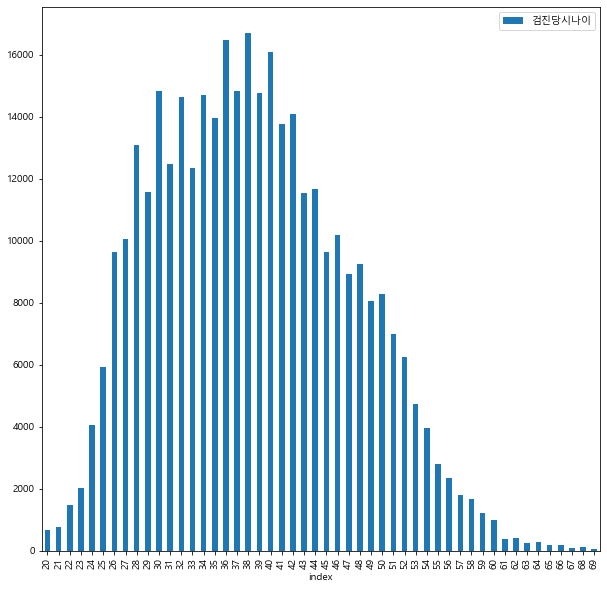

In [428]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [429]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
40,20,660
39,21,746
36,22,1481
33,23,2016
29,24,4063
27,25,5913
19,26,9643
18,27,10055
11,28,13068
15,29,11558


# 검진항목 시각화

In [430]:
df_woman.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target
count,360943.000000,3.609430e+05,3.609430e+05,360943.0,360943.000000,360943.000000,360943.000000,360943.000000,360943.000000,360943.000000,360943.000000,360943.000000,360943.000000,360943.000000,360943.000000
mean,2021.778081,4.946668e+05,1.475733e+06,2.0,38.473205,1.787646,1.212615,29.228910,1.493826,102.882999,104.245828,104.279509,85.061741,99.753171,99.887445
std,1.740354,3.654009e+05,8.075339e+05,0.0,8.549694,0.811797,0.175787,23.725718,1.642305,38.798551,35.271038,28.154929,16.423047,16.446275,8.225289
min,2010.000000,4.800000e+01,2.130000e+02,2.0,20.000000,0.000000,0.661000,0.310000,0.000000,4.070000,0.550000,0.000000,0.000000,12.880000,56.000000
25%,2021.000000,2.155025e+05,6.486815e+05,2.0,32.000000,1.210000,1.120000,29.350000,1.000000,79.120000,90.390000,100.000000,90.000000,90.440000,95.000000
50%,2022.000000,3.701780e+05,1.387125e+06,2.0,38.000000,1.790000,1.210000,29.350000,1.000000,102.570000,100.000000,100.000000,90.000000,98.310000,99.000000
75%,2023.000000,8.232635e+05,2.173000e+06,2.0,44.000000,2.196000,1.310000,29.350000,1.000000,138.500000,135.060000,100.000000,90.000000,111.340000,106.000000
max,2024.000000,1.473631e+06,2.871442e+06,2.0,69.000000,4.255000,1.850000,205.000000,10.000000,150.010000,150.040000,150.000000,100.000000,139.280000,120.000000


<AxesSubplot:xlabel='검진당시나이'>

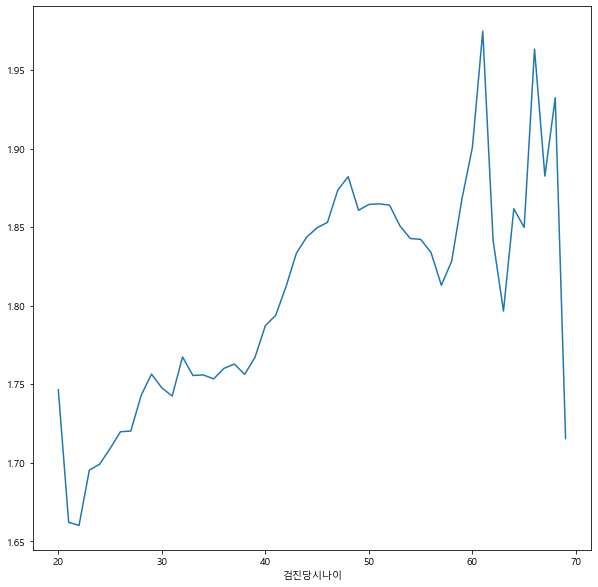

In [431]:
df_woman.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

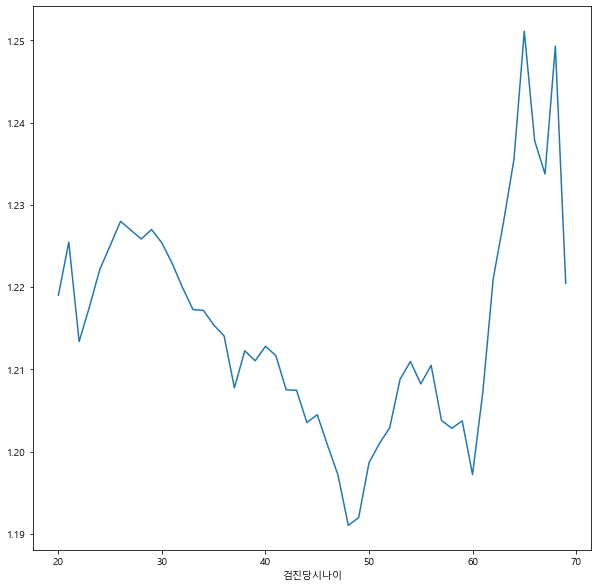

In [432]:
df_woman.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

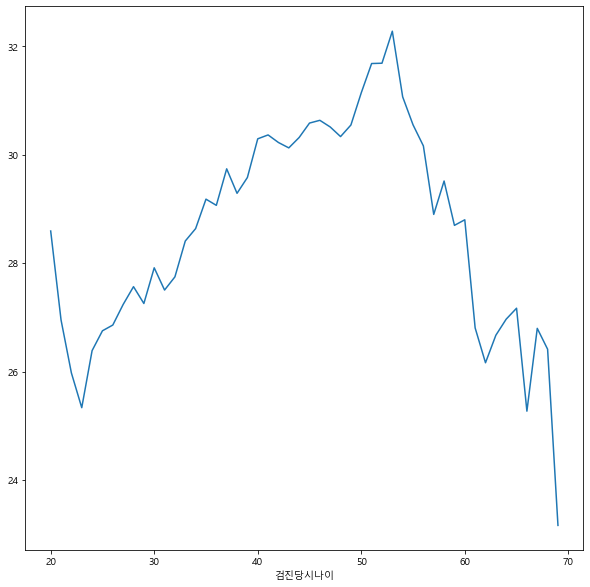

In [433]:
df_woman.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

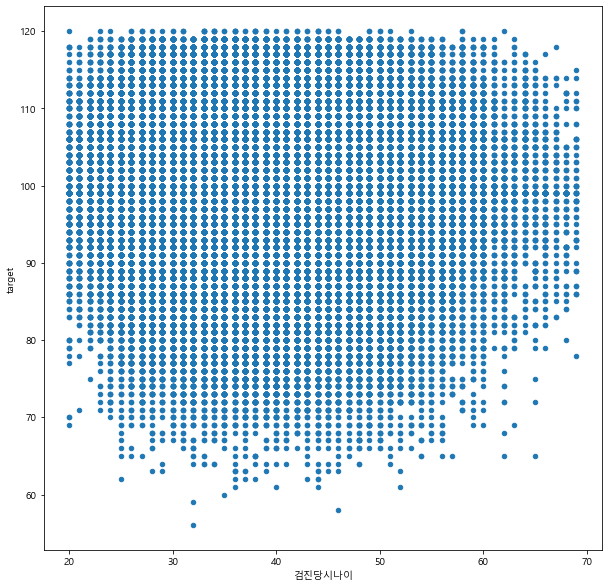

In [434]:
df_woman.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

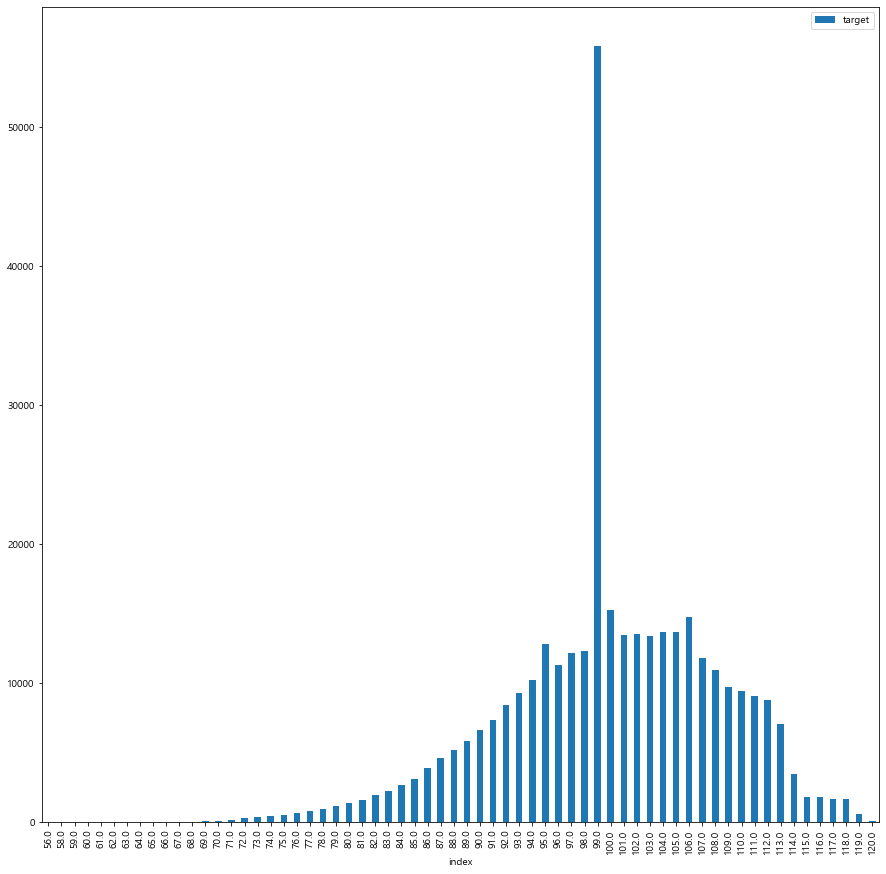

In [435]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [436]:
df_woman['target'].value_counts().reset_index().sort_values('index')

,index,target
62,56.0,1
61,58.0,1
60,59.0,1
63,60.0,1
59,61.0,4
58,62.0,7
57,63.0,13
56,64.0,18
55,65.0,23
54,66.0,33


In [437]:
df_woman_sampling = pd.DataFrame()

# for target in range(int(df_woman['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_woman[df_woman['target'] == target])
    right_len = len(df_woman[df_woman['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == 100]])                    

In [438]:
# df_woman = df_woman_sampling.copy()

<AxesSubplot:xlabel='index'>

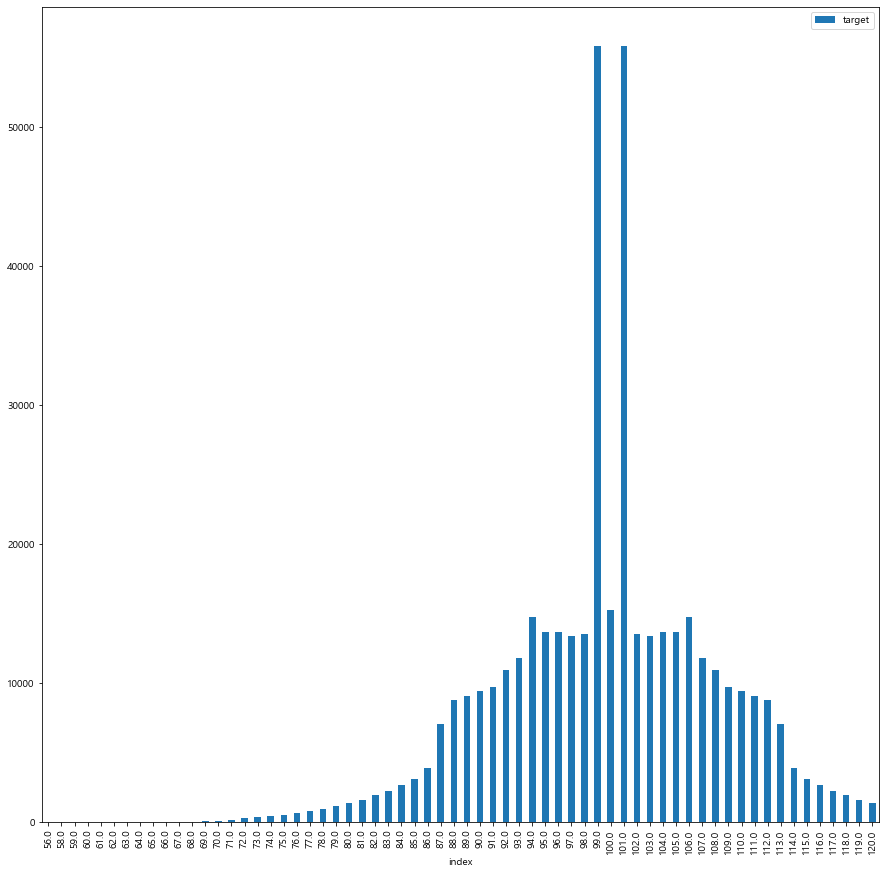

In [439]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [440]:
df_woman_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
63,56.0,1
61,58.0,1
60,59.0,1
62,60.0,1
59,61.0,4
58,62.0,7
57,63.0,13
56,64.0,18
55,65.0,23
54,66.0,33


# 나이별 확인하기

In [441]:
# df_woman['검진당시나이'].value_counts()

In [442]:
# int(df_woman['검진당시나이'].value_counts().mean())

In [443]:
# df_woman['검진당시나이'].min()

In [444]:
# df_woman['검진당시나이'].max()

In [445]:
# df_woman.columns

In [446]:
# df_temp = None
# # sample_len = int(df_woman['검진당시나이'].value_counts().mean())
# # sample_len = 500
                 
# for age in range(df_woman['검진당시나이'].min(), df_woman['검진당시나이'].max()):
#     temp_ = df_woman[df_woman['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [447]:
# df_temp.info()

In [448]:
# df_temp.reset_index(drop=True, inplace=True)

In [449]:
# df_woman = df_temp.copy()

In [450]:
# df_woman['검진당시나이'].value_counts()

In [451]:
# df_woman[df_woman['검진당시나이']==20]

In [452]:
# df_woman[df_woman['검진당시나이']==20]['UID'].value_counts()

# model train

In [453]:
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '신장', '체중']
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '체중']

In [454]:
train_columns

['검진당시나이', '갑상선자극호르몬 (TSH)', 'Free T4', 'T3', '갑상선초음파']

In [455]:
# target_col = '검진당시나이'

In [456]:
target_col

'target'

## Min Max Scaling

In [457]:
from sklearn.preprocessing import MinMaxScaler

In [458]:
scaling_bool

False

In [459]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_woman_sampling[train_columns])
    df_woman_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

In [460]:
if scaling_bool:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_scaled[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [461]:
# model2 = LinearRegression()

In [462]:
# model2.fit(X_train2, y_train2)

In [463]:
# model2.intercept_

In [464]:
# model2.coef_

## Randomized SearchCV, 파라미터 튜닝

In [465]:
model2 = XGBRegressor()

In [466]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [467]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model2, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [468]:
import time
start = time.time()
random_search.fit(X_train2, y_train2)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

RandomizedSearchCV took 1925.56 seconds for 10 candidates parameter settings.


In [469]:
# best parameter
random_search.best_params_

{'objective': 'reg:squarederror',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.5,
 'booster': 'gbtree'}

In [470]:
# best score
random_search.best_score_

-0.6566313237782817

In [471]:
model2 = random_search.best_estimator_
model2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.5,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Keras

In [472]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [473]:
# model = build_model()

In [474]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [475]:
# model.summary()

In [476]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [477]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [478]:
# plot_history(history)

## pyTorch 신경망

In [479]:
np.shape(X_train)[1]

5

In [480]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [481]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [482]:
# epochs = 1000

In [483]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [484]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [485]:
# plt.plot(losses)

## coef 계산

In [486]:
# df_coef2 = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model2.coef_).reset_index(drop=True)], axis=1)

In [487]:
# df_coef2.columns = ['검사항목', 'coef']

In [488]:
# df_coef2['coef'] = df_coef2['coef'].round(4)

In [489]:
# df_coef2['abs_coef'] = df_coef2['coef'].abs()

In [490]:
# df_coef2.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [491]:
# from sklearn.preprocessing import PolynomialFeatures
# poly2 = PolynomialFeatures(degree=1, include_bias=False)

In [492]:
# X_train2_poly = poly2.fit_transform(X_train2)
# X_test2_poly = poly2.fit_transform(X_test2)

In [493]:
# slr2 = LinearRegression()

In [494]:
# slr2.fit(X_train2_poly, y_train2)

In [495]:
# np.shape(X_train2)

In [496]:
# np.shape(X_train2_poly)

In [497]:
# np.shape(X_test2)

In [498]:
# np.shape(X_test2_poly)

In [499]:
# y_pred2_poly = slr2.predict(X_test2_poly)

In [500]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test2, y_pred2_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test2, y_pred2_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2_poly)))

In [501]:
# from sklearn.metrics import r2_score
# r2_score(y_test2, y_pred2_poly)

# model save

In [502]:
import pickle
with open(model_path_woman, 'wb') as f:
    pickle.dump(model2, f)

In [503]:
import pickle
with open(model_path_woman, 'rb') as f:
    model2 = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [504]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model2.eval()
        y_pred2 = model2(X_test2)
        y_pred2 = y_pred2.numpy()

## XGBRegressor

In [505]:
if XGB_bool:
    y_pred2 = model2.predict(X_test2)

In [506]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test2, y_pred2))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test2, y_pred2))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2)))

MAE : 0.43694105615029866
MSE : 0.6298116904373191
RMSE : 0.7936067605793937


In [507]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)

0.9903270135020337

In [508]:
model2.score(X_test2, y_test2)

0.9903270135020337

## feature importance

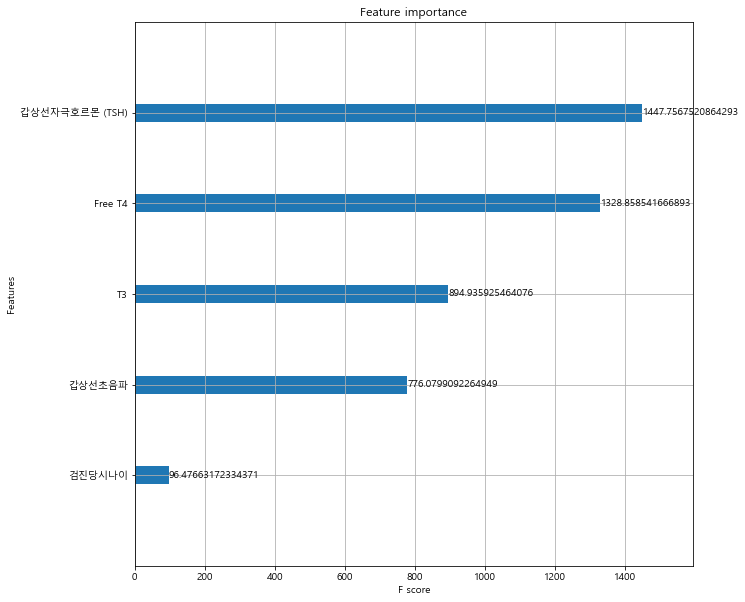

In [509]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model2, importance_type='gain')

In [510]:
model2.feature_importances_

array([0.02123115, 0.31860086, 0.2924355 , 0.19694425, 0.17078817],
      dtype=float32)

In [511]:
df_feature2 = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model2.feature_importances_)], axis=1)
df_feature2.columns = ['columns', 'feature_importance']

In [512]:
df_feature2.sort_values('feature_importance', ascending=False)

,columns,feature_importance
1,갑상선자극호르몬 (TSH),0.318601
2,Free T4,0.292435
3,T3,0.196944
4,갑상선초음파,0.170788
0,검진당시나이,0.021231


# 실제나이 - 예측나이 결과

In [513]:
df_test2 = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), pd.DataFrame(y_pred2).reset_index(drop=True)], axis=1)

In [514]:
df_test2.head()

,target,0
0,98.0,98.083984
1,104.0,104.129593
2,94.0,95.404572
3,99.0,98.969673
4,87.0,86.659164


In [515]:
df_test2.columns

Index(['target', 0], dtype='object')

In [516]:
df_test2.columns = ['실제지수', '예측지수']

In [517]:
df_test2['diff'] = df_test2['예측지수'] - df_test2['실제지수']

In [518]:
df_test2.head()

,실제지수,예측지수,diff
0,98.0,98.083984,0.083984
1,104.0,104.129593,0.129593
2,94.0,95.404572,1.404572
3,99.0,98.969673,-0.030327
4,87.0,86.659164,-0.340836


In [519]:
df_test2['diff_int'] = df_test2['diff'].round(0)

In [520]:
len(df_test2)

109709

In [521]:
df_test2.head()

,실제지수,예측지수,diff,diff_int
0,98.0,98.083984,0.083984,0.0
1,104.0,104.129593,0.129593,0.0
2,94.0,95.404572,1.404572,1.0
3,99.0,98.969673,-0.030327,-0.0
4,87.0,86.659164,-0.340836,-0.0


<AxesSubplot:>

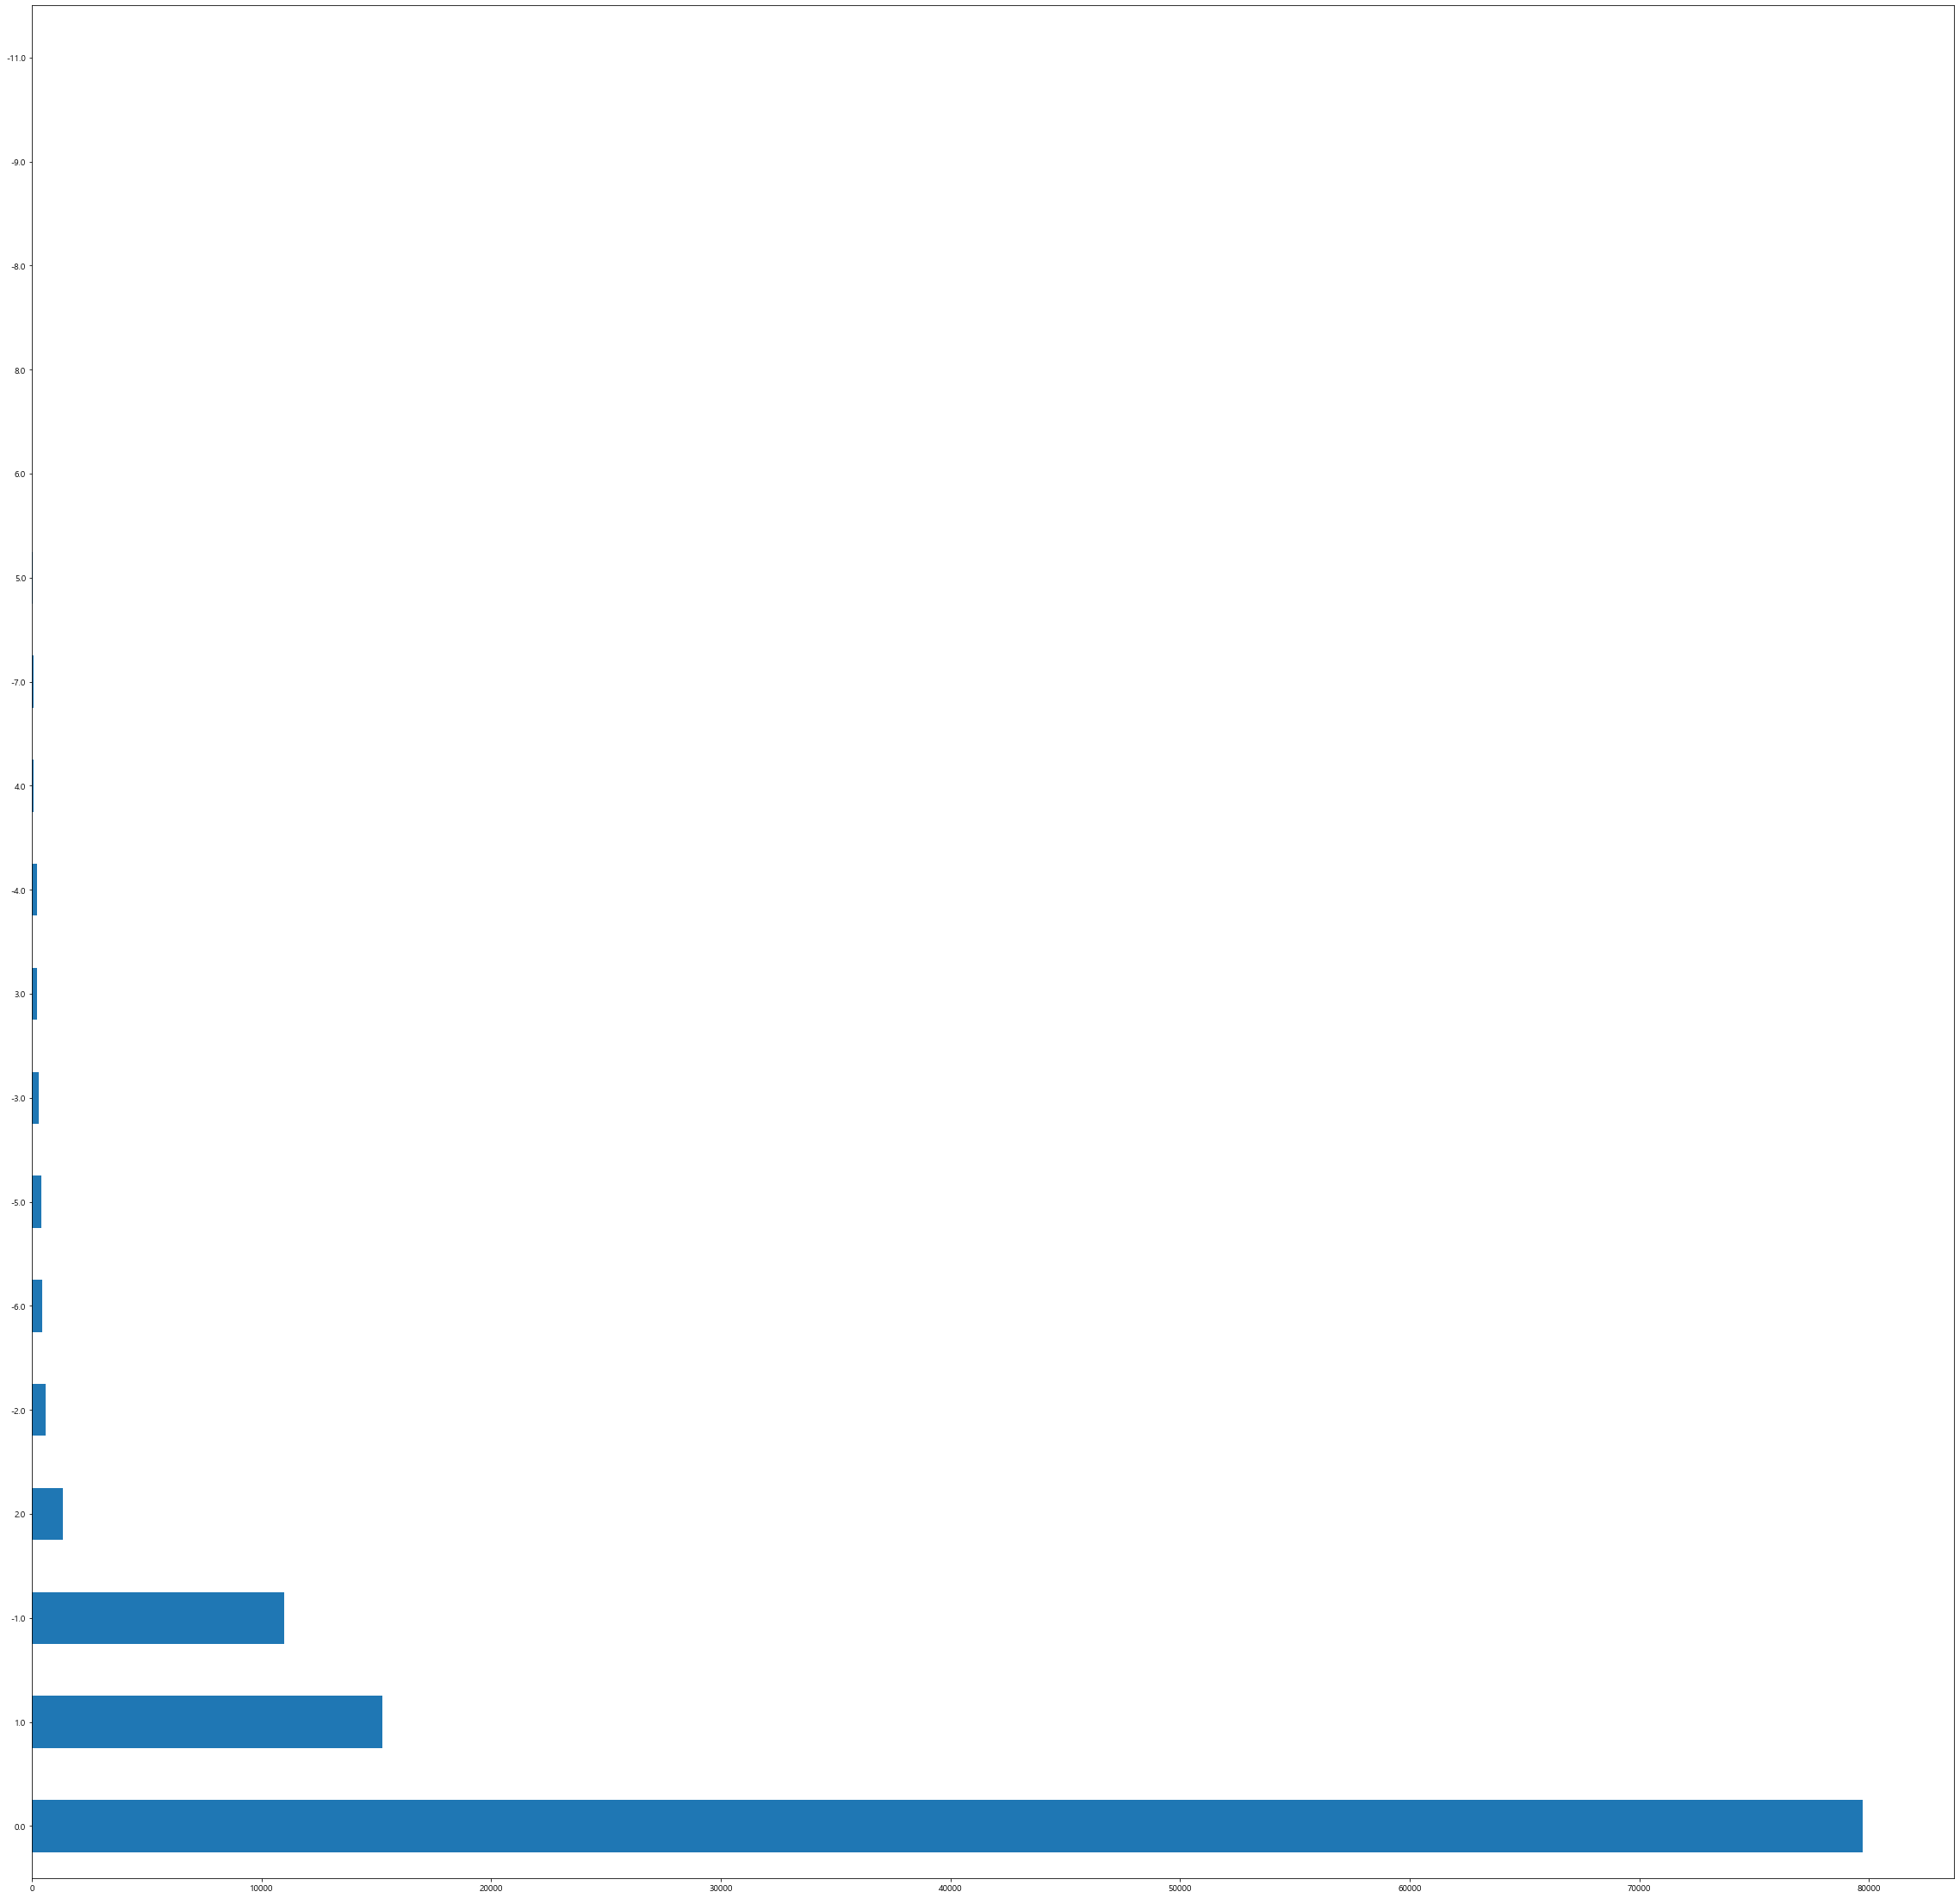

In [522]:
plt.figure(figsize=(40, 40))
df_test2['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_여자.png')

# 예측 나이 분포

In [523]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_train_pred2 = model2(X_train2)
        X_train_pred2 = X_train_pred2.numpy()

    df_train2 = pd.DataFrame(X_train_pred2).reset_index(drop=True)
    y_test2 = pd.DataFrame(y_test2.numpy())

In [524]:
if XGB_bool:
    df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [525]:
df_train2.round(0).value_counts()

99.0     42497
101.0    36563
102.0    13929
100.0    13136
95.0     10699
106.0    10696
94.0     10394
97.0     10366
103.0    10352
104.0    10110
107.0    10076
98.0     10053
96.0      9986
105.0     9773
93.0      9073
108.0     8535
92.0      8221
91.0      7272
90.0      7211
109.0     7028
89.0      6829
110.0     6771
111.0     6595
112.0     6499
88.0      6373
87.0      5207
113.0     5196
86.0      3000
114.0     2926
85.0      2378
115.0     2310
116.0     2035
84.0      1996
117.0     1627
83.0      1620
118.0     1536
82.0      1463
81.0      1163
119.0     1108
120.0     1084
80.0      1063
79.0       885
78.0       737
77.0       573
76.0       474
75.0       393
74.0       337
73.0       299
72.0       224
71.0       117
70.0        92
69.0        87
68.0        48
67.0        31
66.0        26
65.0        18
64.0        15
63.0         9
62.0         4
61.0         3
59.0         1
58.0         1
60.0         1
56.0         1
dtype: int64

In [526]:
y_test2.value_counts()

101.0    13922
99.0     13902
100.0     3824
106.0     3744
94.0      3696
105.0     3531
104.0     3497
96.0      3492
95.0      3411
98.0      3353
102.0     3318
103.0     3303
97.0      3301
107.0     2972
93.0      2931
108.0     2741
92.0      2681
91.0      2484
109.0     2416
110.0     2344
90.0      2334
89.0      2288
111.0     2247
112.0     2196
88.0      2195
87.0      1830
113.0     1743
114.0      983
86.0       968
115.0      792
85.0       754
84.0       706
116.0      702
83.0       580
117.0      558
82.0       526
118.0      460
81.0       422
120.0      388
119.0      369
80.0       334
79.0       282
78.0       229
77.0       212
76.0       161
75.0       148
74.0       120
73.0       103
72.0        68
71.0        33
69.0        28
70.0        27
67.0        19
68.0        19
66.0         7
65.0         5
62.0         4
64.0         3
63.0         2
61.0         1
Name: target, dtype: int64

In [527]:
df_plot = pd.DataFrame(y_test2.value_counts())

In [528]:
df_plot.columns = ['count']

In [529]:
df_plot.reset_index(inplace=True)

In [530]:
df_plot = df_plot.sort_values('index', ascending=True)

In [531]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

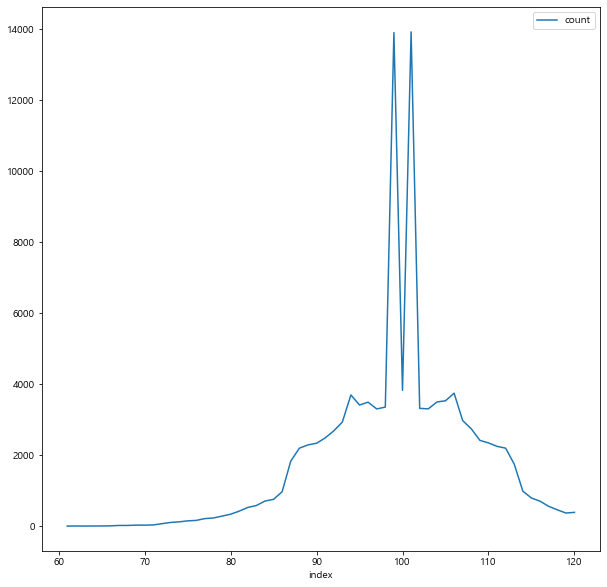

In [532]:
df_plot.plot()

In [533]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_test_pred2 = model2(X_test2)
        X_test_pred2 = X_test_pred2.numpy()
    df_test2 = pd.DataFrame(X_test_pred2).reset_index(drop=True)

In [534]:
if XGB_bool:
    df_test2 = pd.DataFrame(model2.predict(X_test2)).reset_index(drop=True)

In [535]:
df_test2.round(0).value_counts()

99.0     14061
101.0    11945
102.0     4653
100.0     4537
95.0      3645
106.0     3621
107.0     3463
104.0     3425
96.0      3421
103.0     3402
94.0      3394
105.0     3346
97.0      3344
98.0      3288
93.0      2995
108.0     2793
92.0      2735
91.0      2410
90.0      2366
89.0      2365
109.0     2363
110.0     2271
111.0     2175
88.0      2165
112.0     2080
113.0     1743
87.0      1731
86.0       998
114.0      979
115.0      788
85.0       758
84.0       733
116.0      697
83.0       556
117.0      556
82.0       505
118.0      460
81.0       407
120.0      389
119.0      343
80.0       339
79.0       268
78.0       233
77.0       201
76.0       167
75.0       155
74.0       121
73.0        97
72.0        73
71.0        32
69.0        31
70.0        23
68.0        21
67.0        17
66.0        12
65.0         4
61.0         3
63.0         2
64.0         2
62.0         2
dtype: int64

In [536]:
df_plot2 = pd.DataFrame(df_test2.round(0).value_counts())

In [537]:
df_plot2.columns = ['count']

In [538]:
df_plot2.reset_index(inplace=True)

In [539]:
df_plot2

,0,count
0,99.0,14061
1,101.0,11945
2,102.0,4653
3,100.0,4537
4,95.0,3645
5,106.0,3621
6,107.0,3463
7,104.0,3425
8,96.0,3421
9,103.0,3402


In [540]:
df_plot2 = df_plot2.sort_values(0, ascending=True)

In [541]:
df_plot2.set_index(0, inplace=True)

In [542]:
df_plot2

,count
0,
61.0,3
62.0,2
63.0,2
64.0,2
65.0,4
66.0,12
67.0,17
68.0,21
69.0,31


<AxesSubplot:xlabel='0'>

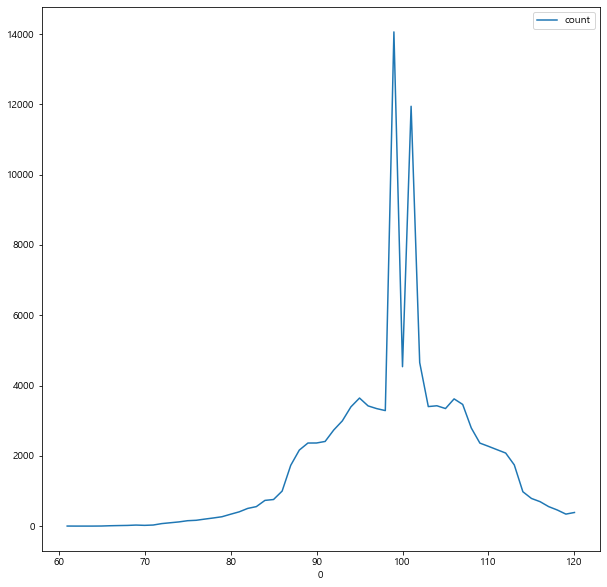

In [543]:
df_plot2.plot()

# 시각화

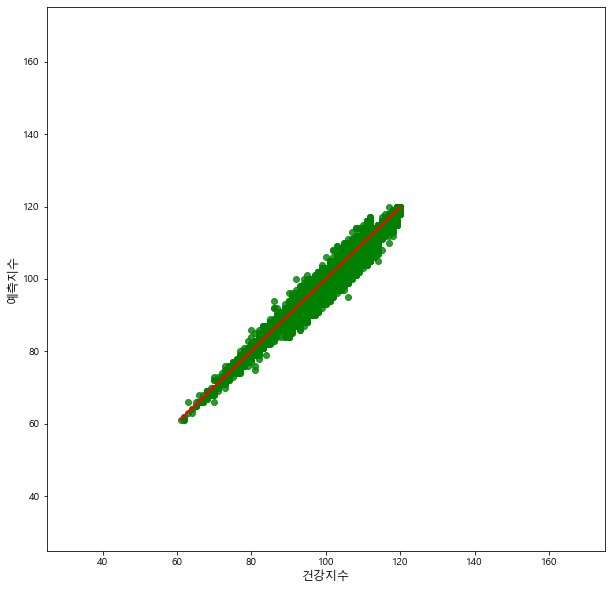

In [544]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), df_test2.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 여성 데이터 전체 계산

In [545]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target
0,2022,48,1140655,2,34,1.790,1.21,29.35,1.0,100.00,100.00,100.0,90.0,97.86,99.0
1,2023,48,2484053,2,35,1.790,1.21,29.35,1.0,100.00,100.00,100.0,90.0,97.86,99.0
2,2021,53,2632765,2,26,0.683,1.22,1.06,0.0,86.67,149.43,150.0,100.0,121.03,111.0
3,2023,53,2632764,2,28,1.790,1.21,29.35,1.0,100.00,100.00,100.0,90.0,97.86,99.0
4,2024,53,2658222,2,29,1.160,1.44,29.35,1.0,148.35,101.80,100.0,90.0,112.19,106.0


In [546]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360943 entries, 0 to 360942
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   검진년도                360943 non-null  int32  
 1   UID                 360943 non-null  int64  
 2   CU_REC_ID           360943 non-null  int64  
 3   SEX                 360943 non-null  int64  
 4   검진당시나이              360943 non-null  int64  
 5   갑상선자극호르몬 (TSH)      360943 non-null  float64
 6   Free T4             360943 non-null  float64
 7   T3                  360943 non-null  float64
 8   갑상선초음파              360943 non-null  float64
 9   갑상선자극호르몬 (TSH)_kde  360943 non-null  float64
 10  Free T4_kde         360943 non-null  float64
 11  T3_kde              360943 non-null  float64
 12  갑상선초음파_scaling      360943 non-null  float64
 13  kde_mean            360943 non-null  float64
 14  target              360943 non-null  float64
dtypes: float64(10), int32(1), int64(4)

In [547]:
df_woman[df_woman['UID'] == 196909]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target
77676,2022,196909,2495702,2,29,3.96,1.47,1.41,0.0,15.57,90.81,149.94,100.0,83.95,92.0
77677,2024,196909,2495697,2,31,3.53,1.43,1.13,0.0,23.14,90.20,150.00,100.0,85.95,93.0


In [548]:
if scaling_bool:
    df_pred2 = df_woman_scaled.copy()
else:
    df_pred2 = df_woman.copy()

In [549]:
len(df_pred2)

360943

In [550]:
df_pred2.reset_index(drop=True, inplace=True)

In [551]:
X_test2

,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파
76700,28,2.04,1.050,29.35,0.0
189986,26,0.93,1.030,0.77,5.0
295086,44,2.83,1.210,29.35,1.0
339413,42,1.79,1.210,29.35,1.0
176207,38,1.01,0.910,104.40,5.0
...,...,...,...,...,...
154753,22,1.76,1.120,29.35,0.0
332136,42,1.79,1.210,29.35,1.0
194989,51,2.50,1.200,29.35,1.0
280521,28,0.92,1.600,29.35,1.0


In [552]:
df_pred2.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '갑상선자극호르몬 (TSH)',
       'Free T4', 'T3', '갑상선초음파', '갑상선자극호르몬 (TSH)_kde', 'Free T4_kde',
       'T3_kde', '갑상선초음파_scaling', 'kde_mean', 'target'],
      dtype='object')

In [553]:
df_pred2[train_columns]

,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파
0,34,1.790,1.21,29.35,1.0
1,35,1.790,1.21,29.35,1.0
2,26,0.683,1.22,1.06,0.0
3,28,1.790,1.21,29.35,1.0
4,29,1.160,1.44,29.35,1.0
...,...,...,...,...,...
360938,60,1.790,1.21,29.35,1.0
360939,62,1.790,1.21,29.35,1.0
360940,56,1.360,1.15,29.35,1.0
360941,30,1.790,1.21,29.35,1.0


In [554]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        pred_data2 = model2(torch.Tensor(df_pred2[train_columns].to_numpy()))
        pred_data2 = pred_data2.numpy()

In [555]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_pred2[train_columns])

In [556]:
pred_data2

array([ 99.054565,  98.91536 , 110.67577 , ..., 107.70197 ,  98.99047 ,
        98.96967 ], dtype=float32)

In [557]:
df_output2 = pd.concat([df_pred2, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [558]:
if scaling_bool:
    df_output2 = pd.concat([df_woman[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output2], axis=1)

In [559]:
df_output2.head(10)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target,예측지수
0,2022,48,1140655,2,34,1.790,1.21,29.35,1.0,100.00,100.00,100.0,90.0,97.86,99.0,99.054565
1,2023,48,2484053,2,35,1.790,1.21,29.35,1.0,100.00,100.00,100.0,90.0,97.86,99.0,98.915359
2,2021,53,2632765,2,26,0.683,1.22,1.06,0.0,86.67,149.43,150.0,100.0,121.03,111.0,110.675774
3,2023,53,2632764,2,28,1.790,1.21,29.35,1.0,100.00,100.00,100.0,90.0,97.86,99.0,99.035797
4,2024,53,2658222,2,29,1.160,1.44,29.35,1.0,148.35,101.80,100.0,90.0,112.19,106.0,105.946793
5,2020,54,497669,2,30,2.690,1.36,29.35,5.0,53.14,122.26,100.0,50.0,82.26,91.0,90.906456
6,2022,54,1319859,2,32,3.700,1.40,29.35,5.0,19.85,104.92,100.0,50.0,67.79,84.0,83.386757
7,2023,54,2039511,2,33,3.670,1.32,29.35,5.0,21.49,144.86,100.0,50.0,79.67,90.0,90.099861
8,2019,56,1605927,2,30,1.790,1.21,29.35,1.0,100.00,100.00,100.0,90.0,97.86,99.0,98.990471
9,2020,56,1605928,2,31,1.790,1.21,29.35,1.0,100.00,100.00,100.0,90.0,97.86,99.0,98.919518


## 예측지수 성능평가

In [560]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['target'], df_output2['예측지수'])

0.44126485110452807

# target으로 나이 계산

In [561]:
df_output2['예측나이'] = ((100 - df_output2['예측지수']) / 5) + df_output2['검진당시나이']
df_output2['예측나이'] = df_output2['예측나이'].round(2)

In [562]:
df_output2.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target,예측지수,예측나이
0,2022,48,1140655,2,34,1.790,1.210,29.35,1.0,100.00,100.00,100.00,90.0,97.86,99.0,99.054565,34.19
1,2023,48,2484053,2,35,1.790,1.210,29.35,1.0,100.00,100.00,100.00,90.0,97.86,99.0,98.915359,35.22
2,2021,53,2632765,2,26,0.683,1.220,1.06,0.0,86.67,149.43,150.00,100.0,121.03,111.0,110.675774,23.86
3,2023,53,2632764,2,28,1.790,1.210,29.35,1.0,100.00,100.00,100.00,90.0,97.86,99.0,99.035797,28.19
4,2024,53,2658222,2,29,1.160,1.440,29.35,1.0,148.35,101.80,100.00,90.0,112.19,106.0,105.946793,27.81
5,2020,54,497669,2,30,2.690,1.360,29.35,5.0,53.14,122.26,100.00,50.0,82.26,91.0,90.906456,31.82
6,2022,54,1319859,2,32,3.700,1.400,29.35,5.0,19.85,104.92,100.00,50.0,67.79,84.0,83.386757,35.32
7,2023,54,2039511,2,33,3.670,1.320,29.35,5.0,21.49,144.86,100.00,50.0,79.67,90.0,90.099861,34.98
8,2019,56,1605927,2,30,1.790,1.210,29.35,1.0,100.00,100.00,100.00,90.0,97.86,99.0,98.990471,30.20
9,2020,56,1605928,2,31,1.790,1.210,29.35,1.0,100.00,100.00,100.00,90.0,97.86,99.0,98.919518,31.22


## 예측나이 성능평가

In [563]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['검진당시나이'], df_output2['예측나이'])

1.2575438504140541

# 최종 산출

In [564]:
df_output2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파,갑상선자극호르몬 (TSH)_kde,Free T4_kde,T3_kde,갑상선초음파_scaling,kde_mean,target,예측지수,예측나이
0,2022,48,1140655,2,34,1.790,1.21,29.35,1.0,100.00,100.00,100.0,90.0,97.86,99.0,99.054565,34.19
1,2023,48,2484053,2,35,1.790,1.21,29.35,1.0,100.00,100.00,100.0,90.0,97.86,99.0,98.915359,35.22
2,2021,53,2632765,2,26,0.683,1.22,1.06,0.0,86.67,149.43,150.0,100.0,121.03,111.0,110.675774,23.86
3,2023,53,2632764,2,28,1.790,1.21,29.35,1.0,100.00,100.00,100.0,90.0,97.86,99.0,99.035797,28.19
4,2024,53,2658222,2,29,1.160,1.44,29.35,1.0,148.35,101.80,100.0,90.0,112.19,106.0,105.946793,27.81


# DataMart csv

In [565]:
df_copy = df.copy()

In [566]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파
0,2010,7282,2520,1,42,2.560,NaN,1.06,None,NaN
1,2010,7490,3638,1,39,2.900,1.39,NaN,정상,0.0
2,2010,7915,3997,1,36,0.918,NaN,1.16,None,NaN
3,2010,8056,4745,1,42,1.200,NaN,NaN,정상,0.0
4,2010,8457,3929,1,38,1.317,NaN,1.13,None,NaN


In [567]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 10 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   검진년도                        1213899 non-null  int32  
 1   UID                         1213899 non-null  int64  
 2   CU_REC_ID                   1213899 non-null  int64  
 3   SEX                         1213899 non-null  int64  
 4   검진당시나이                      1213899 non-null  int64  
 5   갑상선자극호르몬 (TSH)              1077063 non-null  float64
 6   Free T4                     992958 non-null   float64
 7   T3                          314605 non-null   float64
 8   갑상선초음파 (Thyroid Sono)_text  609062 non-null   object 
 9   갑상선초음파                      605618 non-null   float64
dtypes: float64(4), int32(1), int64(4), object(1)
memory usage: 88.0+ MB


In [568]:
minimums

[-0.7450000000000001, 0.6600000000000004, -121.55000000000001, -7.5]

In [569]:
maximums

[4.255, 1.8599999999999997, 205.25, 12.5]

In [570]:
train_columns

['검진당시나이', '갑상선자극호르몬 (TSH)', 'Free T4', 'T3', '갑상선초음파']

In [571]:
target_cols

['갑상선자극호르몬 (TSH)', 'Free T4', 'T3', '갑상선초음파']

In [572]:
for idx, col in enumerate(target_cols):
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [573]:
df_woman_csv = df_copy[df_copy['SEX'] == 2]
len(df_woman_csv)

448440

In [574]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파
10,2010,15894,2533,2,29,2.60,NaN,NaN,None,NaN
22,2010,42223,1364,2,24,1.00,NaN,NaN,None,NaN
37,2011,364096,6645,2,32,2.18,1.26,NaN,없음,0.0
45,2010,120518,3595,2,30,NaN,NaN,NaN,None,NaN
63,2011,698706,6600,2,36,NaN,NaN,NaN,NaN,NaN


## 검진 항목 all 결측치 지우기

In [575]:
target_cols

['갑상선자극호르몬 (TSH)', 'Free T4', 'T3', '갑상선초음파']

In [576]:
df_woman_csv.dropna(subset=target_cols, how='all', inplace=True)

In [577]:
df_woman_csv.reset_index(drop=True, inplace=True)

In [578]:
len(df_woman_csv)

402269

## fillna

In [579]:
df_woman.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '갑상선자극호르몬 (TSH)',
       'Free T4', 'T3', '갑상선초음파', '갑상선자극호르몬 (TSH)_kde', 'Free T4_kde',
       'T3_kde', '갑상선초음파_scaling', 'kde_mean', 'target'],
      dtype='object')

In [580]:
df_woman_csv.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '갑상선자극호르몬 (TSH)',
       'Free T4', 'T3', '갑상선초음파 (Thyroid Sono)_text', '갑상선초음파'],
      dtype='object')

In [581]:
df_woman_csv.isnull().sum()

검진년도                               0
UID                                0
CU_REC_ID                          0
SEX                                0
검진당시나이                             0
갑상선자극호르몬 (TSH)                  8042
Free T4                        40781
T3                            292183
갑상선초음파 (Thyroid Sono)_text    165464
갑상선초음파                        166992
dtype: int64

In [582]:
df_woman_csv['갑상선초음파'].fillna(fill_th, inplace=True)

In [583]:
df_woman_csv.fillna(df_woman.mean().round(2), inplace=True)

## 스크리닝

In [584]:
# screening = 80

In [585]:
# scr_col = 'ALP'

In [586]:
# df_woman_csv[df_woman_csv[scr_col] < screening].head()

In [587]:
# len(df_woman_csv[df_woman_csv[scr_col] < screening])

In [588]:
# df_woman_csv.loc[df_woman_csv[scr_col] < screening, scr_col] = screening

In [589]:
# df_woman_csv[df_woman_csv[scr_col] < screening].head()

In [590]:
# len(df_woman_csv[df_woman_csv[scr_col] < screening])

In [591]:
# len(df_woman_csv)

## 모델 예측

In [592]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_woman_csv[train_columns])

In [593]:
pred_data2 = pred_data2.round(0)

In [594]:
df_woman_csv = pd.concat([df_woman_csv, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [595]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,예측지수
0,2010,15894,2533,2,29,2.60,1.21,29.23,None,1.0,95.0
1,2010,42223,1364,2,24,1.00,1.21,29.23,None,1.0,105.0
2,2011,364096,6645,2,32,2.18,1.26,29.23,없음,0.0,106.0
3,2010,167053,3087,2,26,2.60,1.21,29.23,None,1.0,93.0
4,2019,7687,1867229,2,42,3.66,1.38,29.23,NaN,1.0,90.0


### 성능 평가

In [596]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_woman_csv['target'], df_woman_csv['예측지수']))

In [597]:
# r2_score(df_woman_csv['target'], df_woman_csv['예측지수'])

## 예측나이 계산

In [598]:
df_woman_csv['예측나이'] = ((100 - df_woman_csv['예측지수']) / 5) + df_woman_csv['검진당시나이']
df_woman_csv['예측나이'] = df_woman_csv['예측나이'].round(2)

### 성능 평가

In [599]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_woman_csv['검진당시나이'], df_woman_csv['예측나이']))

MAE : 1.4921994983456344


In [600]:
r2_score(df_woman_csv['검진당시나이'], df_woman_csv['예측나이'])

0.9498990164520977

In [601]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,예측지수,예측나이
0,2010,15894,2533,2,29,2.60,1.21,29.23,None,1.0,95.0,30.0
1,2010,42223,1364,2,24,1.00,1.21,29.23,None,1.0,105.0,23.0
2,2011,364096,6645,2,32,2.18,1.26,29.23,없음,0.0,106.0,30.8
3,2010,167053,3087,2,26,2.60,1.21,29.23,None,1.0,93.0,27.4
4,2019,7687,1867229,2,42,3.66,1.38,29.23,NaN,1.0,90.0,44.0


In [602]:
df_woman_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402269 entries, 0 to 402268
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   검진년도                        402269 non-null  int32  
 1   UID                         402269 non-null  int64  
 2   CU_REC_ID                   402269 non-null  int64  
 3   SEX                         402269 non-null  int64  
 4   검진당시나이                      402269 non-null  int64  
 5   갑상선자극호르몬 (TSH)              402269 non-null  float64
 6   Free T4                     402269 non-null  float64
 7   T3                          402269 non-null  float64
 8   갑상선초음파 (Thyroid Sono)_text  236805 non-null  object 
 9   갑상선초음파                      402269 non-null  float64
 10  예측지수                        402269 non-null  float32
 11  예측나이                        402269 non-null  float64
dtypes: float32(1), float64(5), int32(1), int64(4), object(1)
memory usage: 3

# 최종 UID별 확인

In [603]:
# 성윤..
df_woman_csv[df_woman_csv['UID'] == 261581].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,예측지수,예측나이
107032,2021,261581,806568,2,50,2.170,1.60,0.93,NaN,1.0,94.0,51.2
107040,2021,261581,2243879,2,50,2.170,1.60,0.93,NaN,1.0,94.0,51.2
107041,2021,261581,2418909,2,50,2.170,1.60,0.93,NaN,1.0,94.0,51.2
107042,2021,261581,2418910,2,50,2.170,1.60,0.93,NaN,1.0,94.0,51.2
166809,2022,261581,751339,2,51,1.070,1.32,29.23,None,1.0,104.0,50.2
166812,2022,261581,2243878,2,51,1.070,1.32,29.23,None,1.0,104.0,50.2
255001,2023,261581,1519764,2,52,0.777,1.26,1.12,None,1.0,107.0,50.6
255002,2023,261581,2243877,2,52,0.777,1.26,1.12,None,1.0,107.0,50.6
368531,2024,261581,2418911,2,53,1.110,1.52,0.95,None,1.0,100.0,53.0


In [604]:
# 차종..
df_woman_csv[df_woman_csv['UID'] == 477944].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,예측지수,예측나이
53378,2022,477944,956268,2,31,1.85,1.27,1.21,갑상선낭종,1.0,114.0,28.2
197521,2022,477944,2212776,2,31,1.85,1.27,1.21,갑상선낭종,1.0,114.0,28.2
297663,2023,477944,1454346,2,32,3.54,1.23,0.97,갑상선낭종,1.0,100.0,32.0
297664,2023,477944,2212775,2,32,3.54,1.23,0.97,갑상선낭종,1.0,100.0,32.0
380779,2024,477944,2362855,2,33,2.40,1.53,1.29,None,1.0,93.0,34.4


In [605]:
# 성혜빈
df_woman_csv[df_woman_csv['UID'] == 896916].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,예측지수,예측나이
322415,2023,896916,1459636,2,28,1.69,1.11,0.85,갑상선낭종,1.0,109.0,26.2
322404,2023,896916,1842092,2,28,1.69,1.11,0.85,갑상선낭종,1.0,109.0,26.2
322416,2023,896916,2031853,2,28,1.69,1.11,0.85,갑상선낭종,1.0,109.0,26.2
322417,2023,896916,2253054,2,28,1.69,1.11,0.85,갑상선낭종,1.0,109.0,26.2
316850,2023,896916,2257188,2,28,1.69,1.11,0.85,갑상선낭종,1.0,109.0,26.2
391504,2024,896916,2253058,2,29,2.19,1.22,1.00,갑상선낭종,1.0,111.0,26.8


# 최종 CSV 병합 Extract

In [606]:
len(df_man_csv)

693473

In [607]:
len(df_woman_csv)

402269

In [608]:
df_csv = pd.concat([df_man_csv, df_woman_csv])

In [609]:
df_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,갑상선자극호르몬 (TSH),Free T4,T3,갑상선초음파 (Thyroid Sono)_text,갑상선초음파,예측지수,예측나이
0,2010,7282,2520,1,42,2.560,1.29,1.06,None,1.0,100.0,42.0
1,2010,7490,3638,1,39,2.900,1.39,30.81,정상,0.0,98.0,39.4
2,2010,7915,3997,1,36,0.918,1.29,1.16,None,1.0,111.0,33.8
3,2010,8056,4745,1,42,1.200,1.29,30.81,정상,0.0,108.0,40.4
4,2010,8457,3929,1,38,1.317,1.29,1.13,None,1.0,113.0,35.4


In [610]:
df_csv.to_csv(csv_path)